# **Import Library**

In [1]:
import pandas as pd

# **Load dataset dan info basic dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df_fraud_train = pd.read_csv('/content/drive/MyDrive/python/fraudTrain.csv')
df_fraud_train

Mounted at /content/drive


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


# **Exploratory Data Analysis (EDA)**

# **Data Cleanning & Analysis**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mutual_info_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom

In [5]:
df_fraud_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,PA,18917,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,67851,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,TN,37040,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
df_fraud_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

**Kolom pada dataset**

---
1. trans_date_trans_time: Waktu transaksi. Dapat digunakan untuk mendeteksi pola waktu (misal transaksi yang sering terjadi pada waktu yang tidak wajar bisa dicurigai sebagai fraud).
2. cc_num: Nomor kartu kredit. Informasi penting terkait pengguna kartu, tetapi tidak langsung membantu mendeteksi fraud kecuali ada pola dari penggunaan kartu yang tidak biasa.
3. merchant: Nama merchant (penjual). Merchant tertentu mungkin lebih sering terlibat dalam transaksi fraud, sehingga bisa membantu mendeteksi risiko terkait merchant.
4. category: Kategori transaksi. Fraud mungkin lebih sering terjadi dalam kategori tertentu seperti barang mewah atau hiburan, yang memiliki nilai transaksi lebih tinggi.
5. amt: Jumlah uang dalam transaksi. Nilai transaksi yang sangat besar atau tidak sesuai dengan pola belanja biasanya bisa menjadi tanda fraud.
6. first: Nama depan pemegang kartu. Tidak terlalu relevan dalam mendeteksi fraud secara langsung.
7. last: Nama belakang pemegang kartu. Sama seperti first, tidak relevan secara langsung.
8. gender: Jenis kelamin pemegang kartu. Bisa digunakan untuk melihat pola demografis terkait fraud, meskipun tidak secara langsung mengindikasikan fraud.
9. street: Alamat jalan pemegang kartu. Dapat digunakan dalam deteksi anomali jika lokasi transaksi berbeda jauh dari alamat pemegang kartu.
10. city: Kota pemegang kartu. Sama seperti street, dapat digunakan untuk memeriksa ketidaksesuaian antara lokasi pemegang kartu dan transaksi.
11. state: Negara bagian pemegang kartu. Sama dengan city, bisa mendeteksi anomali lokasi.
12. zip: Kode pos pemegang kartu. Sama dengan city dan state, bisa membantu mendeteksi anomali geografis.
13. lat: Garis lintang lokasi pemegang kartu. Lokasi geografis dapat membantu mendeteksi ketidaksesuaian jika dibandingkan dengan lokasi transaksi.
14. long: Garis bujur lokasi pemegang kartu. Sama dengan lat, membantu mendeteksi lokasi.
15. city_pop: Populasi kota pemegang kartu. Bisa digunakan untuk memahami risiko terkait daerah, misalnya daerah padat penduduk mungkin memiliki lebih banyak transaksi dan risiko.
16. job: Pekerjaan pemegang kartu. Pekerjaan dengan penghasilan tinggi mungkin lebih rentan terhadap fraud karena lebih sering terlibat dalam transaksi besar.
17. dob: Tanggal lahir pemegang kartu. Usia pemegang kartu bisa menjadi faktor, misalnya kelompok usia tertentu mungkin lebih rentan terhadap fraud.
18. trans_num: ID unik untuk transaksi. Tidak relevan dalam deteksi fraud secara langsung.
19. unix_time: Waktu transaksi dalam format unix. Sama seperti trans_date_trans_time, membantu dalam menganalisis pola waktu.
20. merch_lat: Garis lintang merchant. Dapat digunakan untuk mendeteksi ketidaksesuaian antara lokasi merchant dan pemegang kartu.
21. merch_long: Garis bujur merchant. Sama seperti merch_lat, membantu mendeteksi anomali lokasi.
22. is_fraud: Label apakah transaksi adalah fraud (0 = tidak fraud, 1 = fraud). Ini adalah target yang perlu diprediksi.


In [7]:
df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
df_fraud_train.isna().value_counts()

,,,,,,,,,,,,,,,,,,,,,,,count
Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1296675


Hapus kolom unnamed:0

In [9]:
# drop column ID
df_fraud_train = df_fraud_train.drop(columns=['Unnamed: 0'])

Statistik deskripsi untuk data yang type float dan integer

In [10]:
print (df_fraud_train.describe())

             cc_num           amt           zip           lat          long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01 -9.022634e+01   
std    1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00  1.375908e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01 -9.679800e+01   
50%    3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean   8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  5.788652e-03  
std    3.019564e+05  1.284128e+07  5.109788e+00  1.377

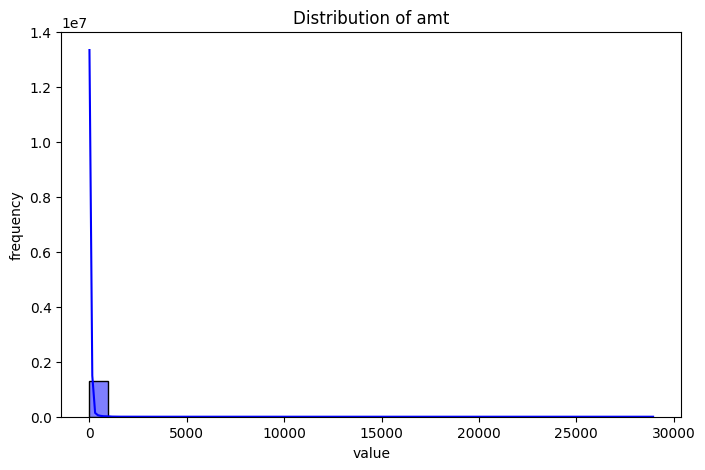

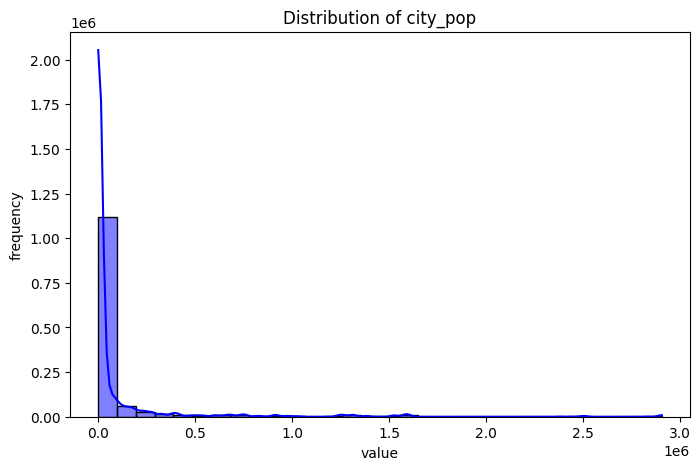

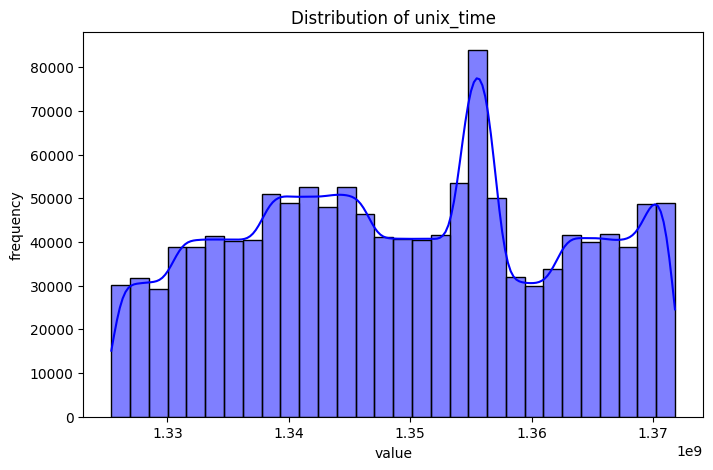

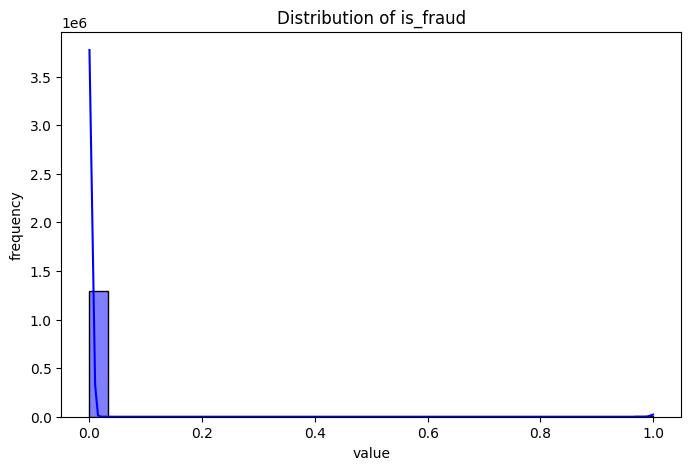

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.histplot(df_fraud_train.amt, kde=True, bins=30, color='blue')
plt.title("Distribution of amt")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_fraud_train.city_pop, kde=True, bins=30, color='blue')
plt.title("Distribution of city_pop")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_fraud_train.unix_time, kde=True, bins=30, color='blue')
plt.title("Distribution of unix_time")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_fraud_train.is_fraud, kde=True, bins=30, color='blue')
plt.title("Distribution of is_fraud")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

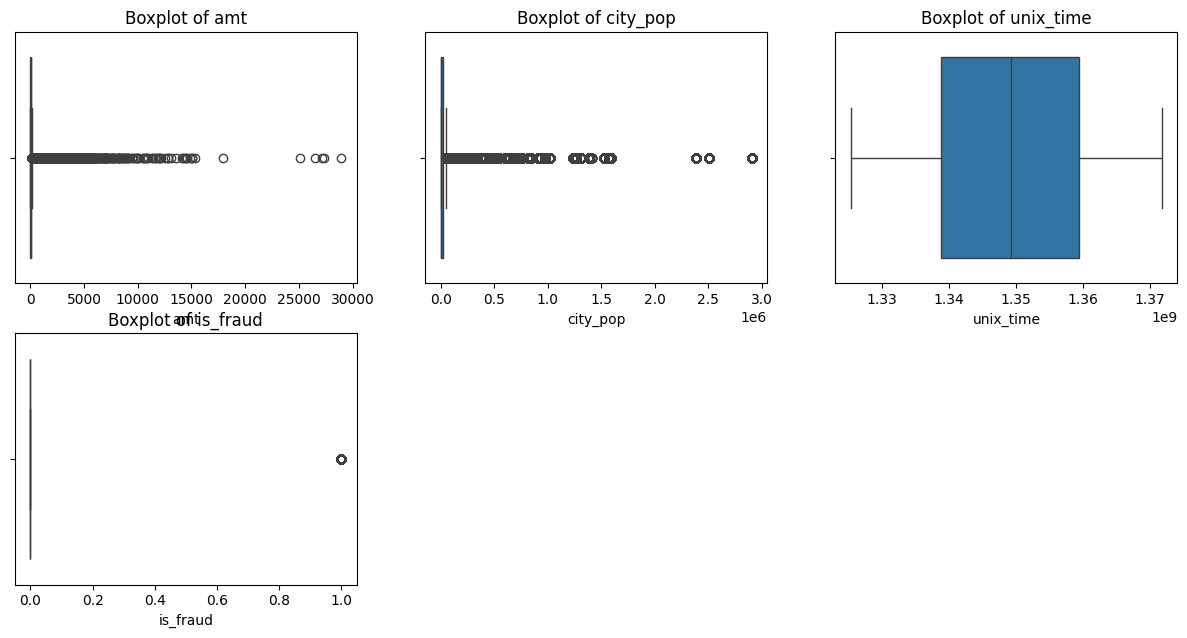

In [12]:
features = ['amt', 'city_pop', 'unix_time', 'is_fraud']
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_fraud_train, x=feature)
    plt.title(f'Boxplot of {feature}')

Variabel dengan kategori type data object (nominal) diubah menjadi type data (ordinal, interval, atau rasio)  

EDA untuk variabel Merchant

In [13]:
df_fraud_train['merchant'].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [14]:
df_fraud_train['merchant'].value_counts()

,count
merchant,
fraud_Kilback LLC,4403
fraud_Cormier LLC,3649
fraud_Schumm PLC,3634
fraud_Kuhn LLC,3510
fraud_Boyer PLC,3493
...,...
"fraud_Douglas, DuBuque and McKenzie",775
fraud_Treutel-King,775
"fraud_Medhurst, Labadie and Gottlieb",759


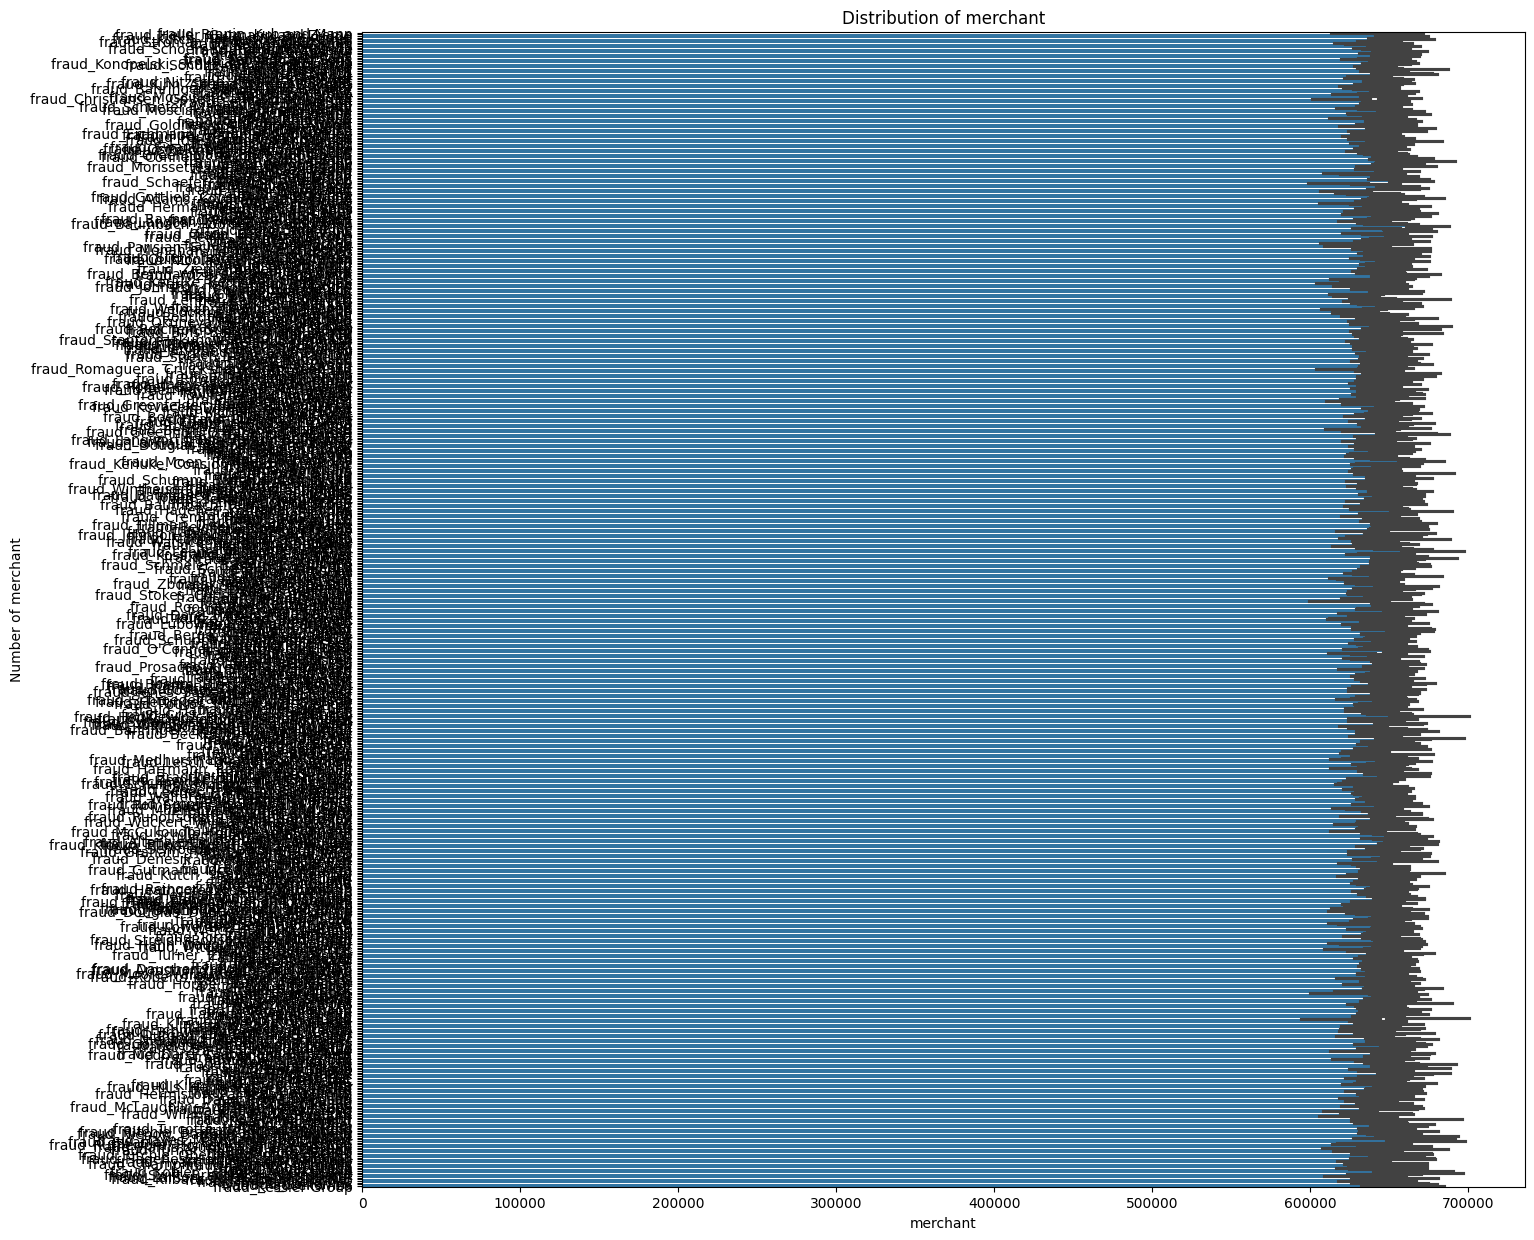

In [15]:
# Visualisasi distribusi merchant berdasarkan jumlah merchant
plt.figure(figsize=(15, 15))
sns.barplot(x=df_fraud_train['merchant'].index, y=df_fraud_train['merchant'].values)
plt.xlabel('merchant')
plt.ylabel('Number of merchant')
plt.title('Distribution of merchant')
plt.show()

In [16]:
jumlah_merchant_per_fraud_status = df_fraud_train.groupby(['merchant', 'is_fraud']).size().unstack(fill_value=0)
jumlah_merchant_per_fraud_status['Total'] = jumlah_merchant_per_fraud_status.sum(axis=1)
jumlah_merchant_per_fraud_status.sort_values(by='Total', ascending=False, inplace=True)
jumlah_merchant_per_fraud_status

is_fraud,0,1,Total
merchant,,,
fraud_Kilback LLC,4356,47,4403
fraud_Cormier LLC,3601,48,3649
fraud_Schumm PLC,3603,31,3634
fraud_Kuhn LLC,3466,44,3510
fraud_Boyer PLC,3453,40,3493
...,...,...,...
fraud_Treutel-King,773,2,775
"fraud_Douglas, DuBuque and McKenzie",772,3,775
"fraud_Medhurst, Labadie and Gottlieb",757,2,759


In [17]:
#  distribusi merchant berdasarkan jumlah merchant dan is_fraud
merchant_fraud_count = df_fraud_train.groupby(['merchant', 'is_fraud']).size().reset_index(name='count')
pivot_table = merchant_fraud_count.pivot(index='merchant', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
merchant,,,,
fraud_Kozey-Boehm,1818.0,48.0,1866.0,2.572347
"fraud_Herman, Treutel and Dickens",1267.0,33.0,1300.0,2.538462
fraud_Kerluke-Abshire,1797.0,41.0,1838.0,2.230686
fraud_Brown PLC,1150.0,26.0,1176.0,2.210884
fraud_Goyette Inc,1901.0,42.0,1943.0,2.161606
...,...,...,...,...
fraud_Osinski Inc,1821.0,0.0,1821.0,0.000000
"fraud_Hodkiewicz, Prohaska and Paucek",787.0,0.0,787.0,0.000000
"fraud_Schroeder, Wolff and Hermiston",825.0,0.0,825.0,0.000000


In [18]:
# Distribusi transaksi merchant berdasarkan is_fraud
merchant_fraud_percentage = df_fraud_train.groupby('merchant')['is_fraud'].mean() * 100
merchant_fraud_percentage.sort_values(ascending=False)

,is_fraud
merchant,
fraud_Kozey-Boehm,2.572347
"fraud_Herman, Treutel and Dickens",2.538462
fraud_Kerluke-Abshire,2.230686
fraud_Brown PLC,2.210884
fraud_Goyette Inc,2.161606
...,...
fraud_Osinski Inc,0.000000
"fraud_Hodkiewicz, Prohaska and Paucek",0.000000
"fraud_Schroeder, Wolff and Hermiston",0.000000


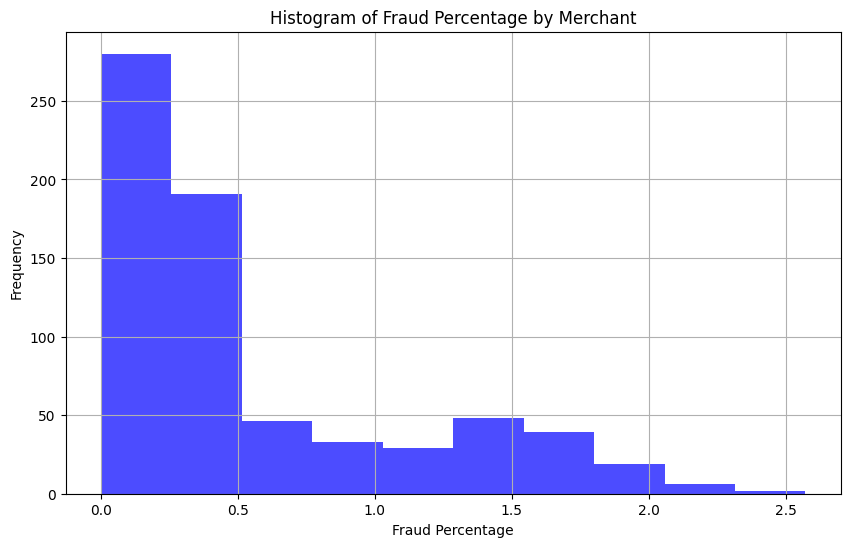

In [19]:
#kelompokkan merchant berdasarkan fraud percentage dalam visualisasi grafik
merchant_fraud_percentage = df_fraud_train.groupby('merchant')['is_fraud'].mean() * 100
merchant_fraud_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(merchant_fraud_percentage, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fraud Percentage by Merchant')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

kategori kembali untuk jumlah merchant berdasarkan percentage fraud

In [20]:
#kategori baru untuk merchant berdasarkan percentage merchant_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
merchant_fraud_percentage = df_fraud_train.groupby('merchant')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan merchant berdasarkan persentase fraud
def categorize_merchant_fraud_percentage(fraud_pct):
    if fraud_pct < 1:
        return 0
    elif 1 <= fraud_pct <= 2:
        return 1
    elif fraud_pct >= 2:
        return 2
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['merchant_fraud_category'] = df_fraud_train['merchant'].map(merchant_fraud_percentage).apply(categorize_merchant_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)


        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [21]:
df_fraud_train['merchant_fraud_category'].value_counts()

,count
merchant_fraud_category,
0,1011114
1,271521
2,14040


EDA untuk variabel Category

In [22]:
df_fraud_train['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [23]:
df_fraud_train['category'].value_counts()

,count
category,
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758


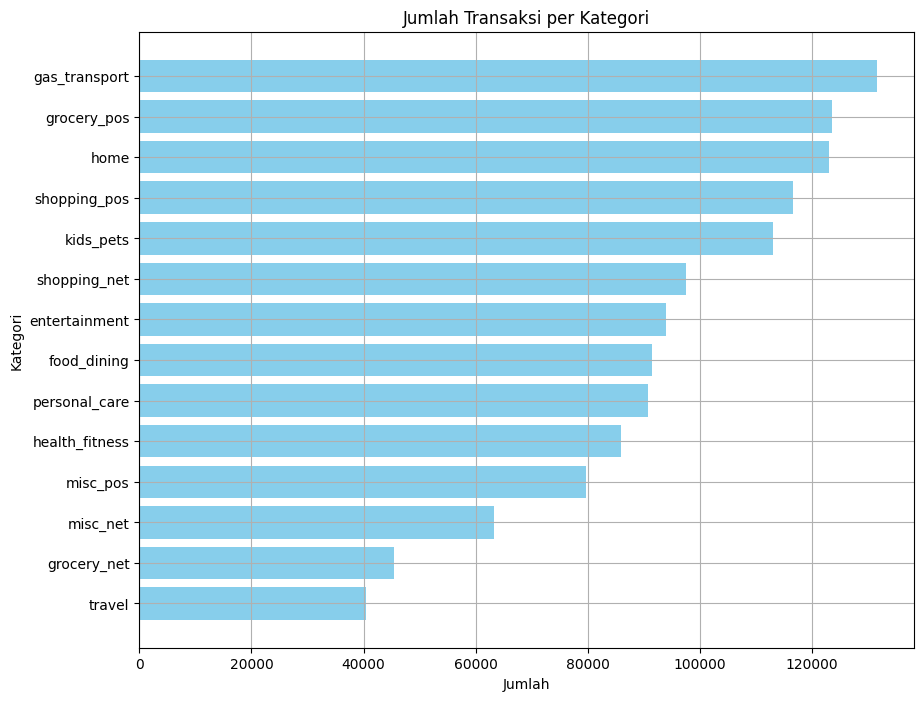

In [24]:
data = df_fraud_train['category'].value_counts()
data = data.reset_index()
data.columns = ['category', 'count']

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengurutkan data berdasarkan jumlah untuk visualisasi yang lebih baik
df = df.sort_values('count', ascending=True)

# Membuat grafik batang
plt.figure(figsize=(10, 8))
plt.barh(df['category'], df['count'], color='skyblue')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.title('Jumlah Transaksi per Kategori')
plt.grid(True)

# Menampilkan grafik
plt.show()

In [25]:
#  distribusi category berdasarkan jumlah category dan is_fraud
category_fraud_count = df_fraud_train.groupby(['category', 'is_fraud']).size().reset_index(name='count')
pivot_table = category_fraud_count.pivot(index='category', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table


is_fraud,0,1,Total,Fraud_Percentage
category,,,,
shopping_net,95830,1713,97543,1.756149
misc_net,62372,915,63287,1.445795
grocery_pos,121895,1743,123638,1.409761
shopping_pos,115829,843,116672,0.722538
gas_transport,131041,618,131659,0.469394
misc_pos,79405,250,79655,0.313853
grocery_net,45318,134,45452,0.294817
travel,40391,116,40507,0.286370
entertainment,93781,233,94014,0.247835


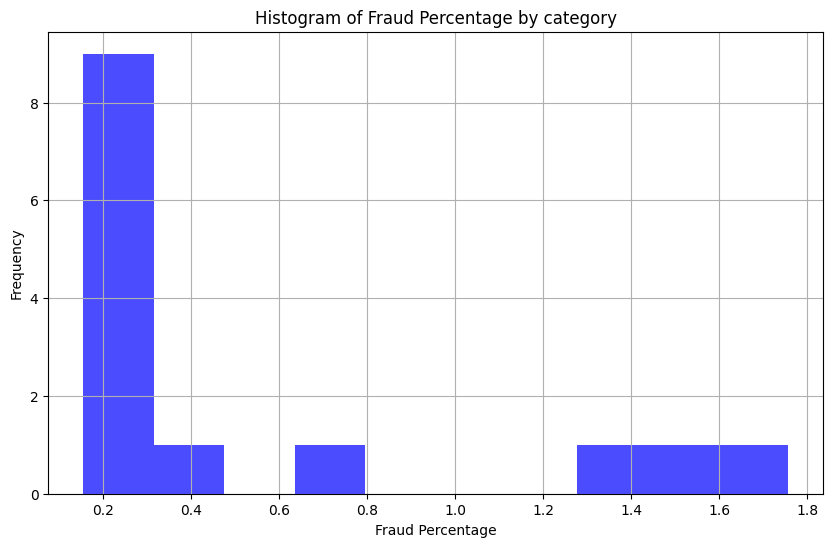

In [26]:
#kelompokkan category berdasarkan fraud percentage dalam visualisasi grafik
category_fraud_percentage = df_fraud_train.groupby('category')['is_fraud'].mean() * 100
category_fraud_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(category_fraud_percentage, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fraud Percentage by category')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# Periksa kolom yang ada di DataFrame
print(df_fraud_train.columns)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merchant_fraud_category'],
      dtype='object')


In [30]:
# Periksa tipe data kolom 'category'
print(df_fraud_train['category'].dtype)

object


In [31]:

def classify_parent_category(category):
    if category in ['grocery_pos', 'grocery_net', 'shopping_net', 'shopping_pos']:
        return 'Belanja'
    elif category == 'gas_transport':
        return 'Transportasi dan Bahan Bakar'
    elif category == 'food_dining':
        return 'Makanan dan Restoran'
    elif category in ['entertainment', 'travel']:
        return 'Hiburan dan Rekreasi'
    elif category in ['health_fitness', 'personal_care']:
        return 'Kesehatan dan Kebugaran'
    elif category in ['home', 'kids_pets']:
        return 'Kebutuhan Rumah Tangga dan Lainnya'
    elif category in ['misc_net', 'misc_pos']:
        return 'Transaksi Lainnya'
    else:
        return 'Kategori Tidak Dikenal'

try:
    df_fraud_train['parent_category'] = df_fraud_train['category'].apply(classify_parent_category)
    print(df_fraud_train)
except Exception as e:
    print("Error: ", e)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [32]:
df_fraud_train['parent_category'].value_counts()

,count
parent_category,
Belanja,383305
Kebutuhan Rumah Tangga dan Lainnya,236150
Kesehatan dan Kebugaran,176637
Transaksi Lainnya,142942
Hiburan dan Rekreasi,134521
Transportasi dan Bahan Bakar,131659
Makanan dan Restoran,91461


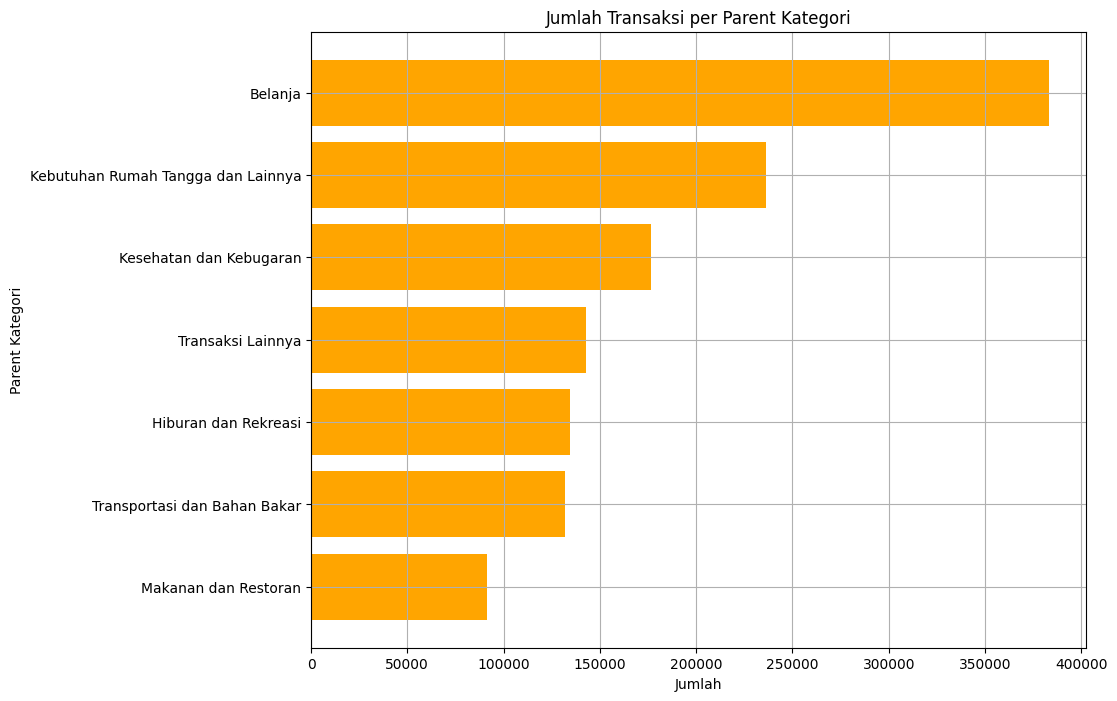

In [33]:
data = df_fraud_train['parent_category'].value_counts()
data = data.reset_index()
data.columns = ['parent_category', 'count']

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengurutkan data berdasarkan jumlah untuk visualisasi yang lebih baik
df = df.sort_values('count', ascending=True)

# Membuat grafik batang
plt.figure(figsize=(10, 8))
plt.barh(df['parent_category'], df['count'], color='orange')
plt.xlabel('Jumlah')
plt.ylabel('Parent Kategori')
plt.title('Jumlah Transaksi per Parent Kategori')
plt.grid(True)

# Menampilkan grafik
plt.show()

In [34]:
#  distribusi category berdasarkan jumlah parent category dan is_fraud
category_fraud_count = df_fraud_train.groupby(['parent_category', 'is_fraud']).size().reset_index(name='count')
pivot_table = category_fraud_count.pivot(index='parent_category', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table


is_fraud,0,1,Total,Fraud_Percentage
parent_category,,,,
Belanja,378872,4433,383305,1.156520
Transaksi Lainnya,141777,1165,142942,0.815016
Transportasi dan Bahan Bakar,131041,618,131659,0.469394
Hiburan dan Rekreasi,134172,349,134521,0.259439
Kesehatan dan Kebugaran,176284,353,176637,0.199845
Kebutuhan Rumah Tangga dan Lainnya,235713,437,236150,0.185052
Makanan dan Restoran,91310,151,91461,0.165098


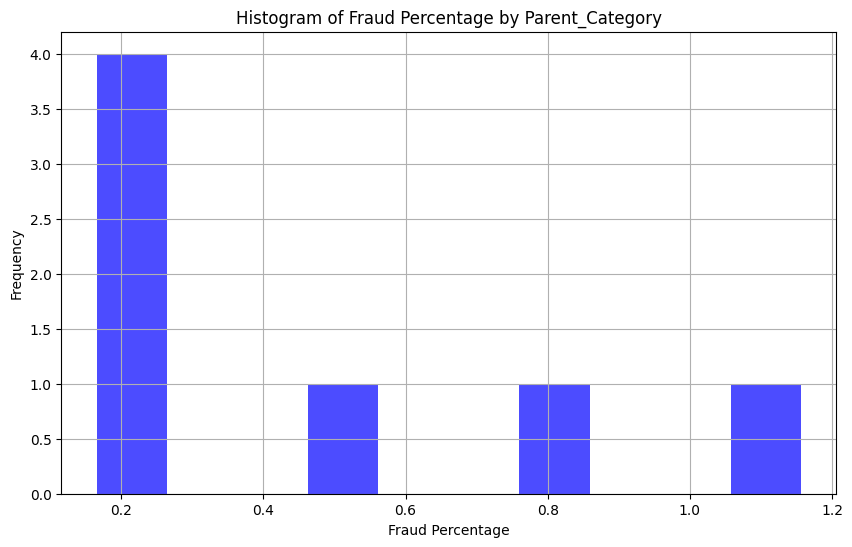

In [35]:
#kelompokkan parent_category berdasarkan fraud percentage dalam visualisasi grafik
parent_cat_fraud_percentage = df_fraud_train.groupby('parent_category')['is_fraud'].mean() * 100
parent_cat_fraud_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(parent_cat_fraud_percentage, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fraud Percentage by Parent_Category')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [36]:
#kategori baru untuk parent category berdasarkan percentage parent category_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
parent_category_fraud_percentage = df_fraud_train.groupby('parent_category')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan merchant berdasarkan persentase fraud
def categorize_parent_category_fraud_percentage(par_cat_fraud_pct):
    if par_cat_fraud_pct < 0.4 :
        return 0
    elif 0.4 <= par_cat_fraud_pct <= 0.8:
        return 1
    elif par_cat_fraud_pct >= 0.8:
        return 2
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['parent_cat_fraud_category'] = df_fraud_train['parent_category'].map(parent_category_fraud_percentage).apply(categorize_parent_category_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [37]:
df_fraud_train['parent_cat_fraud_category'].value_counts()

,count
parent_cat_fraud_category,
0,638769
2,526247
1,131659


EDA untuk variabel AMT

In [38]:
df_fraud_train['amt'].value_counts()

,count
amt,
1.14,542
1.04,538
1.25,535
1.02,533
1.01,523
...,...
334.21,1
674.31,1
358.59,1


In [39]:
#  distribusi category berdasarkan amt  dan is_fraud
amt_fraud_count = df_fraud_train.groupby(['amt', 'is_fraud']).size().reset_index(name='count')
pivot_table = amt_fraud_count.pivot(index='amt', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
amt,,,,
955.18,0.0,1.0,1.0,100.0
725.12,0.0,1.0,1.0,100.0
989.01,0.0,1.0,1.0,100.0
989.16,0.0,1.0,1.0,100.0
989.17,0.0,1.0,1.0,100.0
...,...,...,...,...
184.52,8.0,0.0,8.0,0.0
184.53,9.0,0.0,9.0,0.0
184.54,15.0,0.0,15.0,0.0


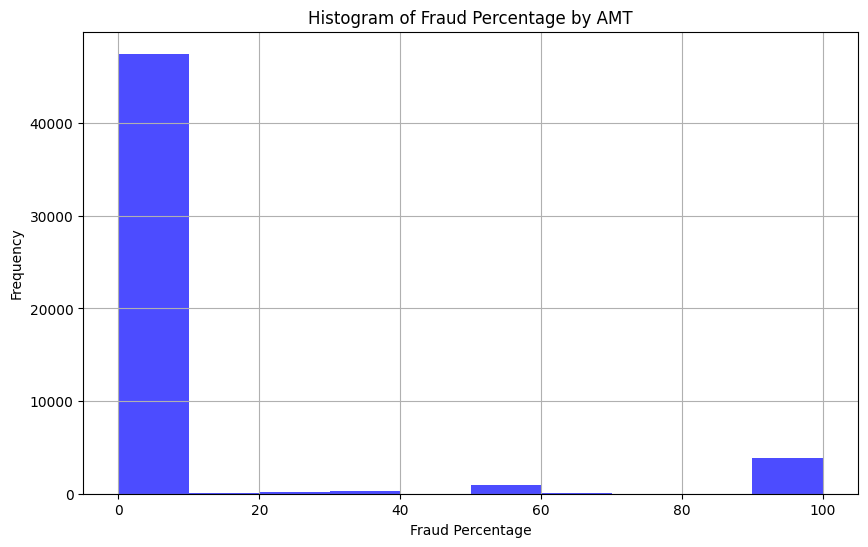

In [40]:
#kelompokkan parent_category berdasarkan fraud percentage dalam visualisasi grafik
amt_fraud_count_percentage = df_fraud_train.groupby('amt')['is_fraud'].mean() * 100
amt_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(amt_fraud_count_percentage, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fraud Percentage by AMT')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [41]:
#kategori baru untuk amt category berdasarkan percentage amt category_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
amt_category_fraud_percentage = df_fraud_train.groupby('amt')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan amt berdasarkan persentase fraud
def categorize_amt_category_fraud_percentage(amt_cat_fraud_pct):
    if amt_cat_fraud_pct < 20:
        return 0
    elif 20 <= amt_cat_fraud_pct <= 40:
        return 1
    elif 40 <= amt_cat_fraud_pct <= 60:
        return 2
    elif 60 <= amt_cat_fraud_pct <= 80:
        return 3
    elif 80 <= amt_cat_fraud_pct <= 100:
        return 4
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['amt_cat_fraud_category'] = df_fraud_train['amt'].map(amt_category_fraud_percentage).apply(categorize_amt_category_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [42]:
df_fraud_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merchant_fraud_category', 'parent_category',
       'parent_cat_fraud_category', 'amt_cat_fraud_category'],
      dtype='object')

In [43]:
df_fraud_train['amt_cat_fraud_category'].value_counts()

,count
amt_cat_fraud_category,
0,1288725
4,4013
2,1965
1,1745
3,227


EDA untuk variabel Gender

In [44]:
df_fraud_train['gender'].value_counts()

,count
gender,
F,709863
M,586812


In [45]:
#  distribusi category berdasarkan gender  dan is_fraud
gender_fraud_count = df_fraud_train.groupby(['gender', 'is_fraud']).size().reset_index(name='count')
pivot_table = gender_fraud_count.pivot(index='gender', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
gender,,,,
M,583041,3771,586812,0.642625
F,706128,3735,709863,0.526158


gender dan is_fraud: persentase kecil shg tidak diikutkan perhitungan

EDA untuk variabel Street, City, State

In [46]:
df_fraud_train['street'].value_counts()

,count
street,
0069 Robin Brooks Apt. 695,3123
864 Reynolds Plains,3123
8172 Robertson Parkways Suite 072,3119
4664 Sanchez Common Suite 930,3117
8030 Beck Motorway,3113
...,...
7281 Joshua Mills Apt. 077,7
3307 Ferguson Way,7
9599 Washington Field Suite 238,7


In [47]:
df_fraud_train['city'].value_counts()

,count
city,
Birmingham,5617
San Antonio,5130
Utica,5105
Phoenix,5075
Meridian,5060
...,...
Vacaville,7
Claypool,7
Karns City,7


In [48]:
df_fraud_train['state'].value_counts()

,count
state,
TX,94876
NY,83501
PA,79847
CA,56360
OH,46480
MI,46154
IL,43252
FL,42671
AL,40989


In [49]:
df_fraud_train['city-state'] = df_fraud_train['city'].astype(str) + '_' + df_fraud_train['state'].astype(str)


In [50]:
df_fraud_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merchant_fraud_category', 'parent_category',
       'parent_cat_fraud_category', 'amt_cat_fraud_category', 'city-state'],
      dtype='object')

In [51]:
df_fraud_train['city-state'].value_counts()

,count
city-state,
San Antonio_TX,5130
Phoenix_AZ,5075
Houston_TX,4168
Naples_FL,4155
Indianapolis_IN,4073
...,...
Norfolk_VA,7
Vacaville_CA,7
Claypool_IN,7


In [52]:
#  distribusi category berdasarkan citystate dan is_fraud
citystate_fraud_count = df_fraud_train.groupby(['city-state', 'is_fraud']).size().reset_index(name='count')
pivot_table = citystate_fraud_count.pivot(index='city-state', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
city-state,,,,
La Grande_OR,0.0,12.0,12.0,100.0
Ashland_KY,0.0,10.0,10.0,100.0
Granbury_TX,0.0,12.0,12.0,100.0
Greenport_NY,0.0,10.0,10.0,100.0
Grenola_KS,0.0,9.0,9.0,100.0
...,...,...,...,...
Malad City_ID,503.0,0.0,503.0,0.0
Luray_MO,1567.0,0.0,1567.0,0.0
Lubbock_TX,1028.0,0.0,1028.0,0.0


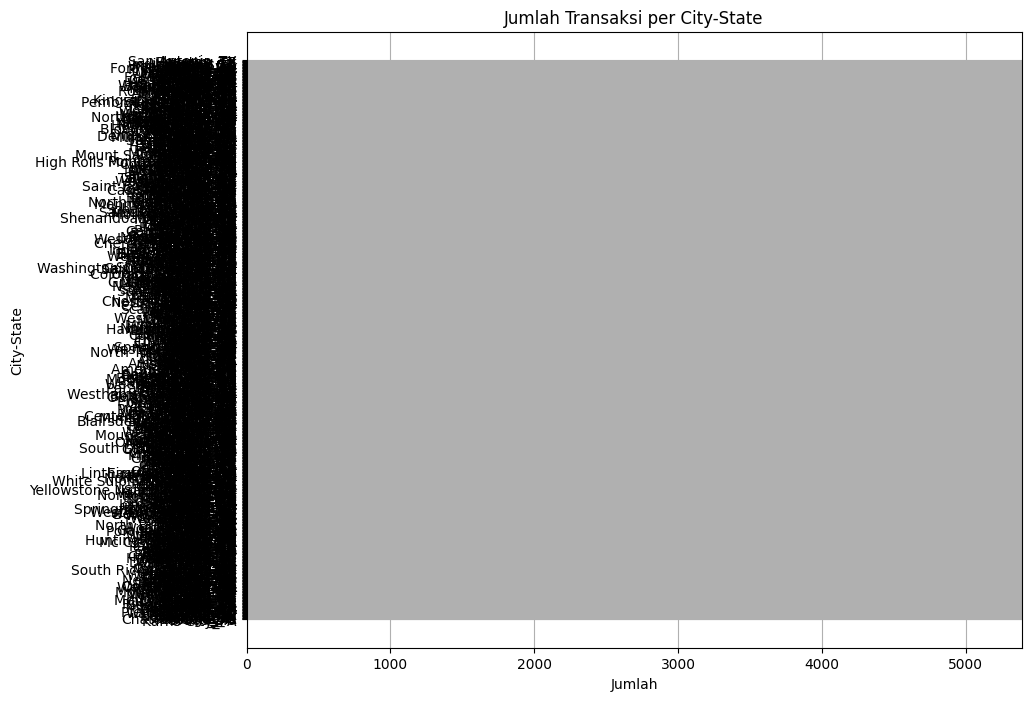

In [53]:
data = df_fraud_train['city-state'].value_counts()
data = data.reset_index()
data.columns = ['city-state', 'count']

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengurutkan data berdasarkan jumlah untuk visualisasi yang lebih baik
df = df.sort_values('count', ascending=True)

# Membuat grafik batang
plt.figure(figsize=(10, 8))
plt.barh(df['city-state'], df['count'], color='black')
plt.xlabel('Jumlah')
plt.ylabel('City-State')
plt.title('Jumlah Transaksi per City-State')
plt.grid(True)

# Menampilkan grafik
plt.show()

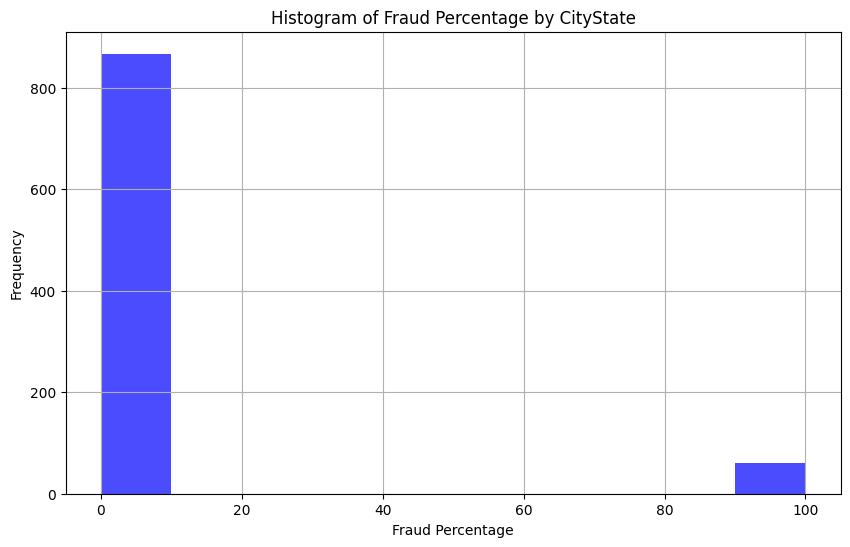

In [54]:
#kelompokkan citystate berdasarkan fraud percentage dalam visualisasi grafik
citystate_fraud_count_percentage = df_fraud_train.groupby('city-state')['is_fraud'].mean() * 100
citystate_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(citystate_fraud_count_percentage, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Fraud Percentage by CityState')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [55]:
#kategori baru untuk citystate category berdasarkan percentage citystate category_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
citystate_category_fraud_percentage = df_fraud_train.groupby('city-state')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan amt berdasarkan persentase fraud
def categorize_citystate_category_fraud_percentage(citystate_cat_fraud_pct):
    if citystate_cat_fraud_pct < 50:
        return 0
    elif 50 <= citystate_cat_fraud_pct <= 100:
        return 1
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['citystate_cat_fraud_category'] = df_fraud_train['city-state'].map(citystate_category_fraud_percentage).apply(categorize_citystate_category_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [56]:
df_fraud_train['citystate_cat_fraud_category'].value_counts()

,count
citystate_cat_fraud_category,
0,1296069
1,606


EDA untuk variabel city_pop

In [57]:
df_fraud_train['city_pop'].value_counts()

,count
city_pop,
606,5496
1595797,5130
1312922,5075
1766,4574
241,4533
...,...
99475,7
198659,7
4046,7


In [58]:
#  distribusi category berdasarkan city_pop dan is_fraud
city_pop_fraud_count = df_fraud_train.groupby(['city_pop', 'is_fraud']).size().reset_index(name='count')
pivot_table = city_pop_fraud_count.pivot(index='city_pop', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
city_pop,,,,
3164,0.0,10.0,10.0,100.0
2801,0.0,8.0,8.0,100.0
67100,0.0,11.0,11.0,100.0
10127,0.0,9.0,9.0,100.0
10085,0.0,12.0,12.0,100.0
...,...,...,...,...
51427,518.0,0.0,518.0,0.0
2799,506.0,0.0,506.0,0.0
2501,1551.0,0.0,1551.0,0.0


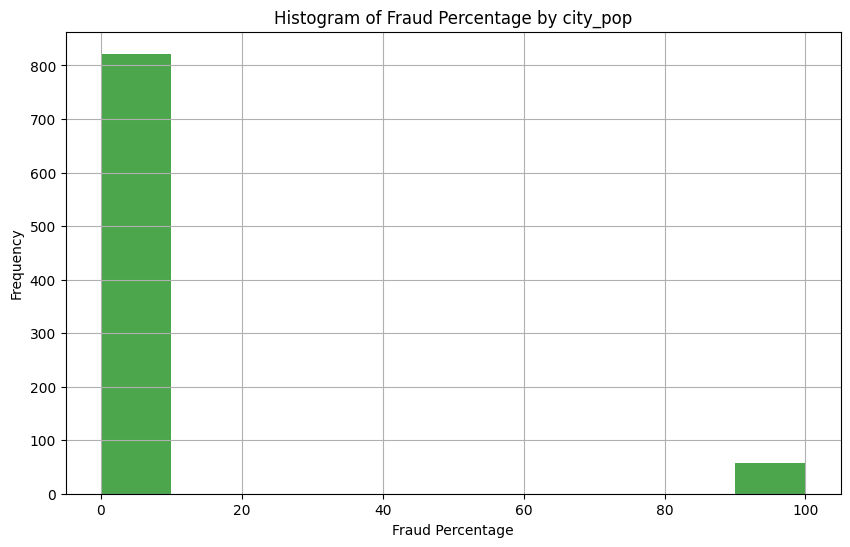

In [59]:
#kelompokkan city_pop berdasarkan fraud percentage dalam visualisasi grafik
city_pop_fraud_count_percentage = df_fraud_train.groupby('city_pop')['is_fraud'].mean() * 100
city_pop_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(city_pop_fraud_count_percentage, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Fraud Percentage by city_pop')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [60]:
#kategori baru untuk city_pop category berdasarkan percentage city_pop category_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
city_pop_category_fraud_percentage = df_fraud_train.groupby('city_pop')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan city_pop berdasarkan persentase fraud
def categorize_city_pop_category_fraud_percentage(city_pop_cat_fraud_pct):
    if city_pop_cat_fraud_pct < 50:
        return 0
    elif 50 <= city_pop_cat_fraud_pct <= 100:
        return 1
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['city_pop_cat_fraud_category'] = df_fraud_train['city_pop'].map(city_pop_category_fraud_percentage).apply(categorize_city_pop_category_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [61]:
df_fraud_train['city_pop_cat_fraud_category'].value_counts()

,count
city_pop_cat_fraud_category,
0,1296110
1,565


EDA untuk variabel job

In [62]:
df_fraud_train['job'].value_counts()

,count
job,
Film/video editor,9779
Exhibition designer,9199
Naval architect,8684
"Surveyor, land/geomatics",8680
Materials engineer,8270
...,...
Information officer,8
Veterinary surgeon,8
Ship broker,7


In [64]:
df_fraud_train['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [65]:
# Array pekerjaan yang diberikan
jobs = np.array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic', 'Librarian, public', 'Fine artist',
       'Scientist, research (maths)', 'Research officer, trade union',
       'Tourism officer', 'Human resources officer', 'Surveyor, minerals',
       'Applications developer', 'Video editor', 'Curator',
       'Research officer, political party', 'Engineer, mining',
       'Education officer, community', 'Physicist, medical',
       'Amenity horticulturist', 'Electrical engineer',
       'Television camera operator', 'Higher education careers adviser',
       'Ambulance person', 'Dealer', 'Paediatric nurse',
       'Trading standards officer', 'Engineer, technical sales',
       'Designer, jewellery', 'Clinical biochemist',
       'Engineer, electronics', 'Water engineer', 'Science writer',
       'Film/video editor', 'Solicitor, Scotland',
       'Product/process development scientist', 'Tree surgeon',
       'Careers information officer', 'Geologist, engineering',
       'Counsellor', 'Freight forwarder',
       'Senior tax professional/tax inspector',
       'Engineer, broadcasting (operations)',
       'English as a second language teacher', 'Economist',
       'Child psychotherapist', 'Claims inspector/assessor',
       'Tourist information centre manager',
       'Exhibitions officer, museum/gallery', 'Location manager',
       'Engineer, biomedical', 'Research scientist (physical sciences)',
       'Purchasing manager', 'Editor, magazine features',
       'Operations geologist', 'Interpreter', 'Engineering geologist',
       'Agricultural consultant', 'Paramedic', 'Financial adviser',
       'Administrator, education', 'Educational psychologist',
       'Financial trader', 'Audiological scientist',
       'Scientist, audiological',
       'Administrator, charities/voluntary organisations',
       'Health service manager', 'Retail merchandiser',
       'Telecommunications researcher', 'Exercise physiologist',
       'Accounting technician', 'Product designer',
       'Waste management officer', 'Mining engineer', 'Surgeon',
       'Therapist, horticultural', 'Environmental consultant',
       'Broadcast presenter', 'Producer, radio',
       'Engineer, communications',
       'Historic buildings inspector/conservation officer',
       'Teacher, English as a foreign language', 'Materials engineer',
       'Health visitor', 'Medical secretary', 'Theatre director',
       'Technical brewer', 'Land/geomatics surveyor',
       'Engineer, structural', 'Diagnostic radiographer',
       'Television production assistant', 'Medical sales representative',
       'Building control surveyor', 'Therapist, sports',
       'Structural engineer', 'Commercial/residential surveyor',
       'Database administrator', 'Exhibition designer',
       'Training and development officer', 'Mechanical engineer',
       'Medical physicist', 'Administrator', 'Mudlogger',
       'Fisheries officer', 'Conservator, museum/gallery',
       'Programmer, multimedia', 'Cytogeneticist',
       'Multimedia programmer', 'Counselling psychologist', 'Chiropodist',
       'Teacher, early years/pre', 'Cartographer', 'Pensions consultant',
       'Primary school teacher', 'Electronics engineer',
       'Museum/gallery exhibitions officer', 'Air broker',
       'Chemical engineer', 'Advertising account executive',
       'Advertising account planner',
       'Chartered legal executive (England and Wales)',
       'Psychiatric nurse', 'Secondary school teacher',
       'Librarian, academic', 'Embryologist, clinical', 'Immunologist',
       'Television floor manager', 'Contractor', 'Health physicist',
       'Copy', 'Bookseller', 'Land', 'Chartered loss adjuster',
       'Occupational psychologist', 'Facilities manager',
       'Further education lecturer', 'Archivist', 'Investment analyst',
       'Engineer, building services', 'Psychologist, sport and exercise',
       'Journalist, newspaper', 'Doctor, hospital', 'Phytotherapist',
       'Pharmacologist', 'Horticultural therapist', 'Hydrologist',
       'Community arts worker', 'Public house manager', 'Architect',
       'Lexicographer', 'Psychotherapist, child',
       'Teacher, secondary school', 'Toxicologist',
       'Commercial horticulturist', 'Podiatrist', 'Building surveyor',
       'Architectural technologist', 'Editor, film/video',
       'Social researcher', 'Wellsite geologist', 'Minerals surveyor',
       'Designer, ceramics/pottery', 'Mental health nurse',
       'Volunteer coordinator', 'Chief Technology Officer',
       'Camera operator', 'Copywriter, advertising', 'Surveyor, mining',
       'Product manager', "Nurse, children's", 'Pension scheme manager',
       'Archaeologist', 'Sub', 'Designer, interior/spatial',
       'Futures trader', 'Chief Financial Officer',
       'Museum education officer', 'Quantity surveyor',
       'Physiological scientist', 'Loss adjuster, chartered',
       'Pilot, airline', 'Production assistant, radio',
       'Immigration officer', 'Retail banker',
       'Health and safety adviser', 'Teacher, special educational needs',
       'Jewellery designer', 'Community pharmacist',
       'Control and instrumentation engineer', 'Make',
       'Early years teacher', 'Sales professional, IT',
       'Scientist, marine', 'Intelligence analyst',
       'Clinical research associate', 'Administrator, local government',
       'Barrister', 'Engineer, control and instrumentation',
       'Clothing/textile technologist', 'Development worker, community',
       'Art therapist', 'Sales executive',
       'Armed forces logistics/support/administrative officer',
       'Optometrist', 'Insurance underwriter', 'Charity officer',
       'Civil Service fast streamer', 'Retail buyer',
       'Magazine features editor', 'Equities trader',
       'Trade mark attorney', 'Research scientist (life sciences)',
       'Psychotherapist', 'Pharmacist, community', 'Risk analyst',
       'Engineer, maintenance', 'Logistics and distribution manager',
       'Water quality scientist', 'Lecturer, further education',
       'Production assistant, television', 'Tour manager',
       'Music therapist', 'Surveyor, land/geomatics',
       'Engineer, production', 'Acupuncturist', 'Hospital doctor',
       'Teacher, primary school', 'Accountant, chartered public finance',
       'Illustrator', 'Scientist, physiological', 'Buyer, industrial',
       'Scientist, research (physical sciences)', 'Radio producer',
       'Manufacturing engineer', 'Animal technologist',
       'Production engineer', 'Biochemist, clinical',
       'Engineer, manufacturing', 'Comptroller',
       'General practice doctor', 'Designer, industrial/product',
       'Prison officer', 'Merchandiser, retail', 'Engineer, drilling',
       'Engineer, petroleum', 'Cabin crew', 'Commissioning editor',
       'Accountant, chartered certified', 'Local government officer',
       'Professor Emeritus', 'Press sub',
       'Chartered public finance accountant', 'Writer',
       'Chief Executive Officer', 'Occupational hygienist',
       'Doctor, general practice', 'Community education officer',
       'Landscape architect', 'Occupational therapist',
       'Special effects artist', 'Civil engineer, contracting',
       "Barrister's clerk", 'Travel agency manager',
       'Associate Professor', 'Neurosurgeon', 'Plant breeder/geneticist',
       'Radio broadcast assistant', 'Field seismologist',
       'Industrial/product designer', 'Metallurgist',
       "Politician's assistant", 'Insurance claims handler',
       'Theme park manager', 'Gaffer', 'Chief Strategy Officer',
       'Heritage manager', 'Ceramics designer', 'Animator',
       'Oceanographer', 'Colour technologist', 'Engineer, agricultural',
       'Therapist, drama', 'Orthoptist', 'Learning mentor',
       'Arts development officer', 'Biomedical engineer',
       'Race relations officer', 'Therapist, music', 'Retail manager',
       'Furniture designer', 'Building services engineer',
       'Maintenance engineer', 'Aid worker', 'Editor, commissioning',
       'Private music teacher', 'Scientist, biomedical',
       'Public relations account executive', 'Dispensing optician',
       'Advice worker', 'Hydrographic surveyor', 'Geoscientist',
       'Environmental health practitioner', 'Learning disability nurse',
       'Chief Operating Officer', 'Scientific laboratory technician',
       'Records manager', 'Barista', 'Marketing executive',
       'Tax inspector', 'Musician', 'Therapist, art',
       'Engineer, automotive', 'Clinical psychologist', 'Warden/ranger',
       'Surveyor, rural practice', 'Sport and exercise psychologist',
       'Education administrator', 'Chief of Staff',
       'Nurse, mental health', 'Music tutor',
       'Planning and development surveyor',
       'Teaching laboratory technician', 'Chief Marketing Officer',
       'Theatre manager', 'Quarry manager',
       'Interior and spatial designer', 'Lecturer, higher education',
       'Regulatory affairs officer', 'Secretary/administrator',
       'Chemist, analytical', 'Designer, exhibition/display',
       'Pharmacist, hospital', 'Site engineer',
       'Equality and diversity officer', 'Public librarian',
       'Town planner', 'Chartered accountant', 'Programmer, applications',
       'Manufacturing systems engineer', 'Web designer',
       'Community development worker', 'Animal nutritionist',
       'Petroleum engineer', 'Information systems manager',
       'Press photographer', 'Insurance risk surveyor', 'Soil scientist',
       'Buyer, retail', 'Public relations officer',
       'Health promotion specialist', 'Psychiatrist',
       'Visual merchandiser', 'Rural practice surveyor', 'Hotel manager',
       'Communications engineer', 'Insurance broker',
       'Radiographer, therapeutic', 'Set designer', 'Tax adviser',
       'Drilling engineer', 'Fitness centre manager', 'Farm manager',
       'Management consultant', 'Energy manager',
       'Museum/gallery conservator', 'Herbalist', 'Osteopath',
       'Statistician', 'Hospital pharmacist', 'Estate manager/land agent',
       'Sports development officer', 'Investment banker, corporate',
       'Biomedical scientist', 'Television/film/video producer',
       'Nutritional therapist', 'Company secretary', 'Production manager',
       'Magazine journalist', 'Media buyer', 'Data scientist',
       'Engineer, civil (contracting)', 'Herpetologist',
       'Garment/textile technologist', 'Scientist, research (medical)',
       'Civil Service administrator', 'Airline pilot', 'Textile designer',
       'Environmental manager', 'Furniture conservator/restorer',
       'Horticultural consultant', 'Firefighter',
       'Geophysicist/field seismologist', 'Psychologist, clinical',
       'Development worker, international aid', 'Sports administrator',
       'IT consultant', 'Presenter, broadcasting',
       'Outdoor activities/education manager', 'Field trials officer',
       'Social research officer, government',
       'English as a foreign language teacher',
       'Restaurant manager, fast food', 'Hydrogeologist',
       'Research scientist (medical)', 'Designer, television/film set',
       'Geneticist, molecular', 'Designer, textile',
       'Licensed conveyancer', 'Emergency planning/management officer',
       'Geologist, wellsite', 'Air cabin crew', 'Seismic interpreter',
       'Surveyor, hydrographic', 'Charity fundraiser', 'Stage manager',
       'Aeronautical engineer', 'Glass blower/designer', 'Ecologist',
       'Horticulturist, commercial', 'Research scientist (maths)',
       'Engineer, aeronautical',
       'Conservation officer, historic buildings', 'Art gallery manager',
       'Advertising copywriter', 'Engineer, civil (consulting)',
       'Oncologist', 'Engineer, materials',
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Investment banker, operational', 'Medical technical officer',
       'Academic librarian', 'Artist', 'Clinical cytogeneticist',
       'TEFL teacher', 'Administrator, arts', 'Teacher, adult education',
       'Catering manager', 'Environmental education officer',
       'Conservator, furniture', 'Analytical chemist',
       'Broadcast engineer', 'Media planner', 'Lawyer',
       'Producer, television/film/video',
       'Armed forces technical officer', 'Engineer, site',
       'Contracting civil engineer', 'Veterinary surgeon',
       'Sales promotion account executive', 'Broadcast journalist',
       'Dancer', 'Forest/woodland manager', 'Personnel officer',
       'Industrial buyer', 'Accountant, chartered',
       'Air traffic controller', 'Careers adviser', 'Information officer',
       'Ship broker', 'Legal secretary', 'Homeopath', 'Solicitor',
       'Warehouse manager'], dtype=object)

# Membuat DataFrame
df = pd.DataFrame(jobs, columns=['Job Category'])

# Fungsi untuk mengkategorikan pekerjaan
def categorize_job(job):
    if 'engineer' in job.lower() or 'architect' in job.lower():
        return 'Engineering/Architecture'
    elif 'manager' in job.lower() or 'officer' in job.lower() or 'executive' in job.lower():
        return 'Management/Administration'
    elif 'teacher' in job.lower() or 'lecturer' in job.lower() or 'educator' in job.lower():
        return 'Education'
    elif 'doctor' in job.lower() or 'nurse' in job.lower() or 'medical' in job.lower() or 'health' in job.lower():
        return 'Healthcare'
    elif 'scientist' in job.lower() or 'researcher' in job.lower():
        return 'Science/Research'
    elif 'designer' in job.lower() or 'artist' in job.lower():
        return 'Design/Arts'
    elif 'consultant' in job.lower() or 'adviser' in job.lower():
        return 'Consultancy/Advisory'
    elif 'technician' in job.lower() or 'technologist' in job.lower():
        return 'Technical'
    elif 'sales' in job.lower() or 'marketing' in job.lower():
        return 'Sales/Marketing'
    elif 'developer' in job.lower() or 'programmer' in job.lower():
        return 'IT/Software Development'
    elif 'analyst' in job.lower():
        return 'Analysis'
    elif 'therapist' in job.lower() or 'counsellor' in job.lower():
        return 'Therapy/Counselling'
    else:
        return 'Other'

# Mengaplikasikan fungsi categorize_job ke kolom 'Category_Job'
df_fraud_train['Category_Job'] = df_fraud_train['job'].apply(categorize_job)

# Menampilkan DataFrame yang telah diupdate
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [66]:
df_fraud_train['Category_Job'].value_counts()

,count
Category_Job,
Other,580471
Management/Administration,181282
Engineering/Architecture,152804
Science/Research,68278
Design/Arts,60966
Healthcare,57258
Therapy/Counselling,52047
Education,48837
Consultancy/Advisory,36524


In [67]:
#  distribusi category berdasarkan Category_Job dan is_fraud
Category_Job_fraud_count = df_fraud_train.groupby(['Category_Job', 'is_fraud']).size().reset_index(name='count')
pivot_table = Category_Job_fraud_count.pivot(index='Category_Job', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
Category_Job,,,,
Management/Administration,180013,1269,181282,0.700014
Sales/Marketing,5479,38,5517,0.688780
Education,48521,316,48837,0.647050
Healthcare,56904,354,57258,0.618254
Other,577112,3359,580471,0.578668
Analysis,11154,64,11218,0.570512
Design/Arts,60619,347,60966,0.569170
Engineering/Architecture,151967,837,152804,0.547761
Science/Research,67921,357,68278,0.522862


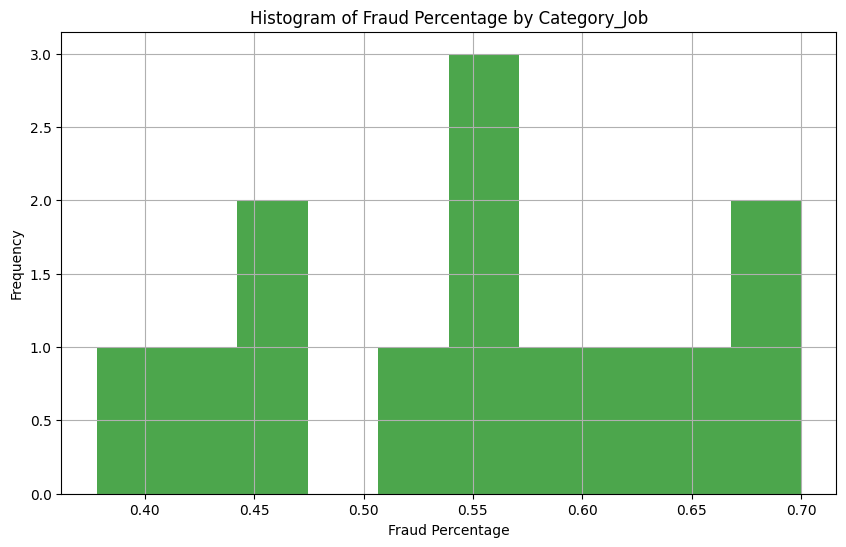

In [68]:
#kelompokkan Category_Job	 berdasarkan fraud percentage dalam visualisasi grafik
Category_Job_fraud_count_percentage = df_fraud_train.groupby('Category_Job')['is_fraud'].mean() * 100
Category_Job_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(Category_Job_fraud_count_percentage, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Fraud Percentage by Category_Job')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [69]:
#kategori baru untuk Category_Job category berdasarkan percentage Category_Job category_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
Category_Job_category_fraud_percentage = df_fraud_train.groupby('Category_Job')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan city_pop berdasarkan persentase fraud
def categorize_Category_Job_category_fraud_percentage(Category_Job_cat_fraud_pct):
    if Category_Job_cat_fraud_pct < 0.5:
        return 0
    elif 0.5 <= Category_Job_cat_fraud_pct < 0.6:
        return 1
    elif Category_Job_cat_fraud_pct >= 0.6:
        return 2
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['Category_Job_cat_fraud_category'] = df_fraud_train['Category_Job'].map(Category_Job_category_fraud_percentage).apply(categorize_Category_Job_category_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [70]:
df_fraud_train['Category_Job_cat_fraud_category'].value_counts()

,count
Category_Job_cat_fraud_category,
1,873737
2,292894
0,130044


In [71]:
df_fraud_train['category'].value_counts()

,count
category,
gas_transport,131659
grocery_pos,123638
home,123115
shopping_pos,116672
kids_pets,113035
shopping_net,97543
entertainment,94014
food_dining,91461
personal_care,90758


EDA untuk variabel Age

In [73]:
df_fraud_train['dob'].value_counts()

,count
dob,
1977-03-23,5636
1981-08-29,4636
1988-09-15,4623
1955-05-06,3661
1995-07-12,3123
...,...
1944-06-17,7
1970-06-25,7
1962-03-14,7


In [74]:
df_sorted = df_fraud_train.sort_values(by='dob')
print(df_sorted)

        trans_date_trans_time            cc_num  \
380810    2019-06-24 02:59:17  2358122155477959   
1050202   2020-03-11 09:01:30  2358122155477959   
681823    2019-10-18 05:12:55  2358122155477959   
731585    2019-11-09 04:55:25  2358122155477959   
480448    2019-07-29 12:53:54  2358122155477959   
...                       ...               ...   
1278508   2020-06-14 22:55:11    36485887555770   
207920    2019-04-15 23:05:22    36485887555770   
358627    2019-06-16 13:28:37    36485887555770   
789924    2019-12-01 23:31:27    36485887555770   
745718    2019-11-15 12:37:55    36485887555770   

                                      merchant        category     amt  \
380810                        fraud_Schumm PLC    shopping_net   16.61   
1050202                fraud_Reynolds-Schinner        misc_pos    7.49   
681823                      fraud_Torp-Labadie   gas_transport   88.18   
731585                    fraud_Heller-Abshire     grocery_net   85.78   
480448   fraud_Co

In [75]:
df_sorted_desc = df_fraud_train.sort_values(by='dob', ascending=False)
print(df_sorted_desc)

        trans_date_trans_time            cc_num  \
964234    2020-01-24 12:17:14    36485887555770   
794741    2019-12-02 19:15:44    36485887555770   
1222258   2020-05-25 20:00:51    36485887555770   
640045    2019-09-29 14:52:13    36485887555770   
355160    2019-06-15 14:23:49    36485887555770   
...                       ...               ...   
1040595   2020-03-07 23:07:33  2358122155477959   
1199432   2020-05-16 18:51:59  2358122155477959   
632631    2019-09-26 11:43:56  2358122155477959   
925081    2020-01-01 05:17:35  2358122155477959   
595411    2019-09-09 13:37:07  2358122155477959   

                                    merchant       category     amt    first  \
964234      fraud_Kutch, Steuber and Gerhold    food_dining   11.59  Michael   
794741                      fraud_Nienow PLC  entertainment   74.96  Michael   
1222258               fraud_Schmidt and Sons   shopping_net   44.68  Michael   
640045                      fraud_Conroy Ltd   shopping_pos  133.65

In [76]:
import datetime as dt

df_fraud_train['age']=dt.date.today().year-pd.to_datetime(df_fraud_train['dob']).dt.year

In [77]:
df_fraud_train['age'].value_counts()

,count
age,
53,45483
41,40038
38,37481
40,37313
51,34299
...,...
92,3041
93,2096
20,1959


In [78]:
df_fraud_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merchant_fraud_category', 'parent_category',
       'parent_cat_fraud_category', 'amt_cat_fraud_category', 'city-state',
       'citystate_cat_fraud_category', 'city_pop_cat_fraud_category',
       'Category_Job', 'Category_Job_cat_fraud_category', 'age'],
      dtype='object')

In [79]:
#  distribusi age berdasarkan age dan is_fraud
Category_Job_fraud_count = df_fraud_train.groupby(['age', 'is_fraud']).size().reset_index(name='count')
pivot_table = Category_Job_fraud_count.pivot(index='age', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
age,,,,
100,0.0,11.0,11.0,100.000000
93,2055.0,41.0,2096.0,1.956107
29,5912.0,96.0,6008.0,1.597870
91,3583.0,54.0,3637.0,1.484740
85,6130.0,88.0,6218.0,1.415246
...,...,...,...,...
52,31162.0,109.0,31271.0,0.348566
50,30176.0,104.0,30280.0,0.343461
41,39904.0,134.0,40038.0,0.334682


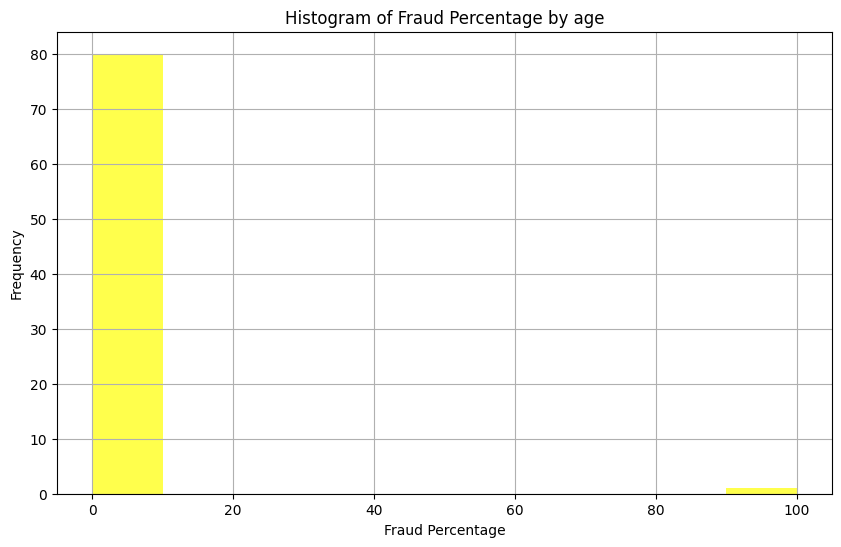

In [80]:
#kelompokkan age berdasarkan fraud percentage dalam visualisasi grafik
Category_Age_fraud_count_percentage = df_fraud_train.groupby('age')['is_fraud'].mean() * 100
Category_Age_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(Category_Age_fraud_count_percentage, bins=10, color='yellow', alpha=0.7)
plt.title('Histogram of Fraud Percentage by age')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

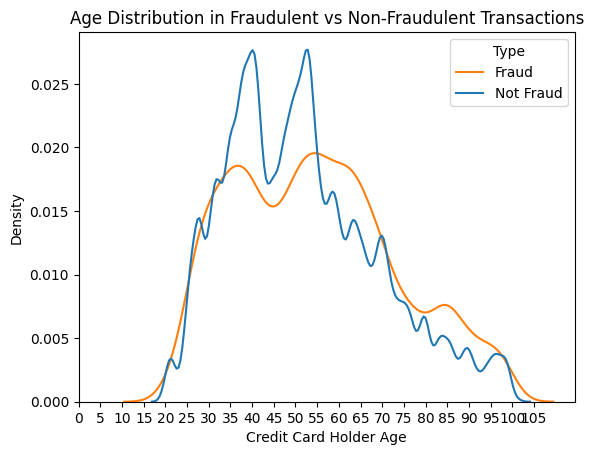

In [81]:
# Age vs Fraud
import datetime as dt
ax=sns.kdeplot(x='age',data=df_fraud_train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [82]:
# Hitung usia pada saat transaksi
df_fraud_train['age_at_transaction'] = (pd.to_datetime(df_fraud_train['trans_date_trans_time']) - pd.to_datetime(df_fraud_train['dob'])).dt.days / 365.25

In [83]:
df_fraud_train['age_at_transaction']

,age_at_transaction
0,30.814511
1,40.531143
2,56.950034
3,51.969884
4,32.763860
...,...
1296670,58.573580
1296671,40.528405
1296672,52.810404
1296673,39.841205


In [84]:
df_fraud_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'merchant_fraud_category', 'parent_category',
       'parent_cat_fraud_category', 'amt_cat_fraud_category', 'city-state',
       'citystate_cat_fraud_category', 'city_pop_cat_fraud_category',
       'Category_Job', 'Category_Job_cat_fraud_category', 'age',
       'age_at_transaction'],
      dtype='object')

In [85]:
#  distribusi age_at_transaction berdasarkan age dan is_fraud
Category_age_at_transaction_fraud_count = df_fraud_train.groupby(['age_at_transaction', 'is_fraud']).size().reset_index(name='count')
pivot_table = Category_age_at_transaction_fraud_count.pivot(index='age_at_transaction', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
age_at_transaction,,,,
17.497604,1.0,9.0,10.0,90.000000
89.927447,1.0,9.0,10.0,90.000000
87.189596,1.0,7.0,8.0,87.500000
81.426420,1.0,5.0,6.0,83.333333
76.290212,1.0,4.0,5.0,80.000000
...,...,...,...,...
41.604381,71.0,0.0,71.0,0.000000
41.601643,79.0,0.0,79.0,0.000000
41.598905,65.0,0.0,65.0,0.000000


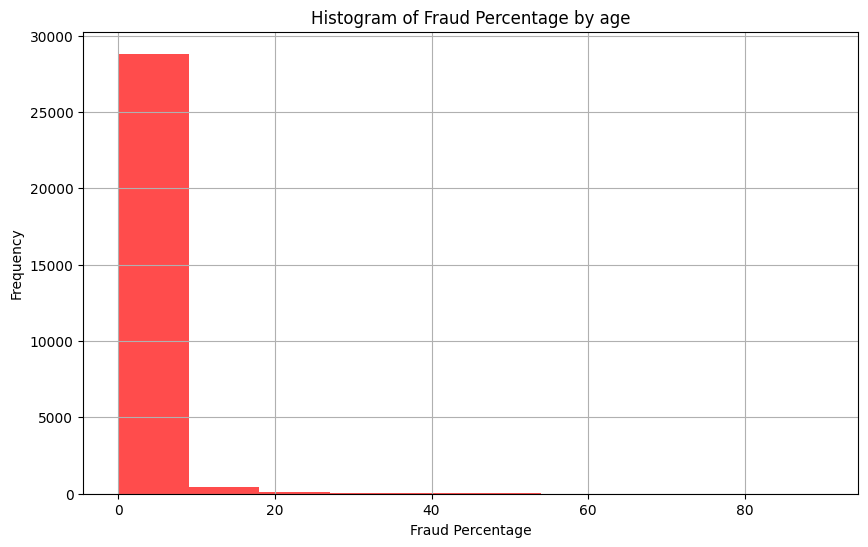

In [86]:
#kelompokkan age_at_transaction  berdasarkan fraud percentage dalam visualisasi grafik
Category_age_at_transaction_fraud_count_percentage = df_fraud_train.groupby('age_at_transaction')['is_fraud'].mean() * 100
Category_age_at_transaction_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(Category_age_at_transaction_fraud_count_percentage, bins=10, color='red', alpha=0.7)
plt.title('Histogram of Fraud Percentage by age')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [89]:
#kategori baru untuk age_at_transaction category berdasarkan percentage age_at_transaction category_fraud_percentage, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
Category_age_at_transaction_fraud_percentage = df_fraud_train.groupby('age_at_transaction')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan age_at_transaction category berdasarkan persentase fraud
def categorize_age_at_transaction_category_fraud_percentage(Category_age_at_transaction_fraud_pct):
    if Category_age_at_transaction_fraud_pct <10:
        return 0
    elif 10 <= Category_age_at_transaction_fraud_pct < 20:
        return 1
    elif 20 <= Category_age_at_transaction_fraud_pct < 40:
        return 2
    elif Category_age_at_transaction_fraud_pct >= 40:
        return 3
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['Age_at_transaction_fraud_category'] = df_fraud_train['age_at_transaction'].map(Category_age_at_transaction_fraud_percentage).apply(categorize_age_at_transaction_category_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [88]:
df_fraud_train['Age_at_transaction_fraud_category'].value_counts()

,count
Age_at_transaction_fraud_category,
0,1271513
1,20247
2,4209
3,706


EDA untuk variabel Long Lat

In [90]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Hitung jarak Haversine antara dua titik koordinat (dalam derajat).
    """
    # Konversi derajat ke radian
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Hitung perbedaan antara koordinat
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Terapkan rumus Haversine
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius bumi dalam kilometer

    # Hitung jarak
    distance = c * r
    return distance

# Terapkan fungsi haversine_distance ke DataFrame
df_fraud_train['distance'] = df_fraud_train.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [91]:
df_fraud_train['distance'].value_counts()

,count
distance,
78.597568,1
85.243924,1
73.551864,1
130.219142,1
76.504194,1
...,...
100.546051,1
80.496512,1
25.423930,1


In [92]:
df_fraud_train['distance']

,distance
0,78.597568
1,30.212176
2,108.206083
3,95.673231
4,77.556744
...,...
1296670,119.752136
1296671,75.104085
1296672,99.047734
1296673,84.627652


In [93]:
#  distribusi distance berdasarkan distance dan is_fraud
Category_distance_fraud_count = df_fraud_train.groupby(['distance', 'is_fraud']).size().reset_index(name='count')
pivot_table = Category_distance_fraud_count.pivot(index='distance', columns='is_fraud', values='count').fillna(0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Fraud_Percentage'] = (pivot_table[1] / pivot_table['Total']) * 100
pivot_table.sort_values(by='Fraud_Percentage', ascending=False, inplace=True)
pivot_table

is_fraud,0,1,Total,Fraud_Percentage
distance,,,,
67.494355,0.0,1.0,1.0,100.0
52.942994,0.0,1.0,1.0,100.0
89.066223,0.0,1.0,1.0,100.0
61.537076,0.0,1.0,1.0,100.0
115.655808,0.0,1.0,1.0,100.0
...,...,...,...,...
63.975923,1.0,0.0,1.0,0.0
63.975906,1.0,0.0,1.0,0.0
63.975832,1.0,0.0,1.0,0.0


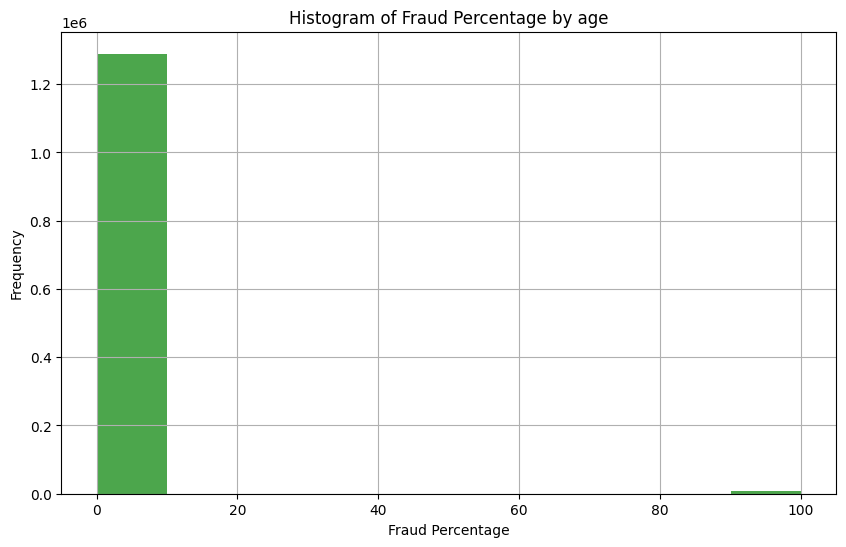

In [94]:
#kelompokkan distance berdasarkan distance dalam visualisasi grafik
Category_distance_fraud_count_percentage = df_fraud_train.groupby('distance')['is_fraud'].mean() * 100
Category_distance_fraud_count_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.hist(Category_distance_fraud_count_percentage, bins=10, color='green', alpha=0.7)
plt.title('Histogram of Fraud Percentage by age')
plt.xlabel('Fraud Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [95]:
#kategori baru untuk distance category berdasarkan percentage distance, kategori baru ini dimasukkan ke dalam kolom atau variabel baru
cat_distance_fraud_percentage = df_fraud_train.groupby('distance')['is_fraud'].mean() * 100

# Fungsi untuk mengkategorikan city_pop berdasarkan persentase fraud
def categorize_distance_fraud_percentage(Category_distance_fraud_pct):
    if Category_distance_fraud_pct <50:
        return 0
    elif Category_distance_fraud_pct >= 50:
        return 1
    else:
        return 'Unknown'

# Terapkan fungsi kategorisasi pada Series dan buat kolom baru
df_fraud_train['distance_fraud_category'] = df_fraud_train['distance'].map(cat_distance_fraud_percentage).apply(categorize_distance_fraud_percentage)

# Tampilkan DataFrame dengan kolom baru
print(df_fraud_train)

        trans_date_trans_time               cc_num  \
0         2019-01-01 00:00:18     2703186189652095   
1         2019-01-01 00:00:44         630423337322   
2         2019-01-01 00:00:51       38859492057661   
3         2019-01-01 00:01:16     3534093764340240   
4         2019-01-01 00:03:06      375534208663984   
...                       ...                  ...   
1296670   2020-06-21 12:12:08       30263540414123   
1296671   2020-06-21 12:12:19     6011149206456997   
1296672   2020-06-21 12:12:32     3514865930894695   
1296673   2020-06-21 12:13:36     2720012583106919   
1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00

In [96]:
df_fraud_train['distance_fraud_category'].value_counts()

,count
distance_fraud_category,
0,1289169
1,7506


EDA untuk variabel hour

Menentukan definisi fraud dari hour, memisahkan hour pada dataset

In [97]:
import pandas as pd

# Asumsi df_fraud_train adalah DataFrame
df_fraud_train['trans_date_trans_time'] = pd.to_datetime(df_fraud_train['trans_date_trans_time'])

# Filter data transaksi fraud
fraud_transactions = df_fraud_train[df_fraud_train['is_fraud'] == 1]

# Ekstrak jam dari kolom trans_date_trans_time untuk transaksi fraud
fraud_transactions['hour'] = df_fraud_train['trans_date_trans_time'].dt.hour

# Hitung jumlah transaksi fraud untuk setiap jam
fraud_by_hour = fraud_transactions['hour'].value_counts().sort_index()

<ipython-input-97-9553a2f9c36e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_transactions['hour'] = df_fraud_train['trans_date_trans_time'].dt.hour


In [98]:
fraud_by_hour

,count
hour,
0,635
1,658
2,625
3,609
4,46
5,60
6,40
7,56
8,49


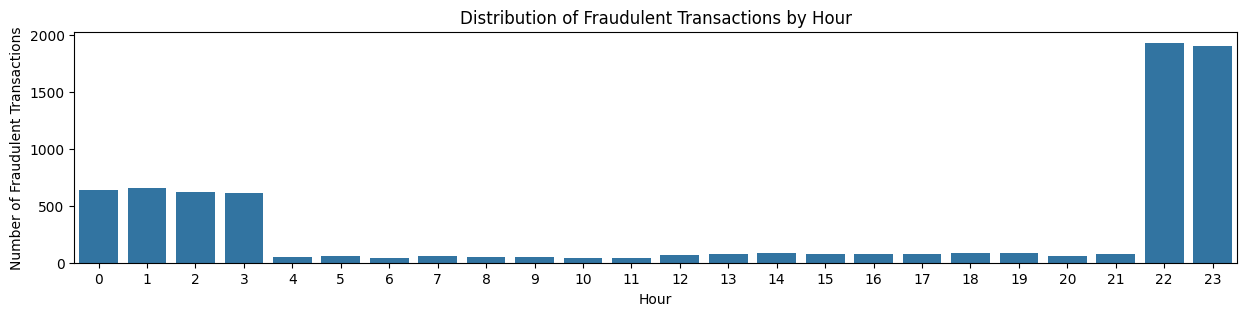

In [99]:
# Visualisasi distribusi transaksi fraud berdasarkan Hour
plt.figure(figsize=(15, 3))
sns.barplot(x=fraud_by_hour.index, y=fraud_by_hour.values)
plt.xlabel('Hour')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Distribution of Fraudulent Transactions by Hour')
plt.show()

Melakukan Definisi Fraud berdasarkan "hour"

In [100]:
df_fraud_train['hour'] = df_fraud_train['trans_date_trans_time'].dt.hour

# def categorize_risk_of_hour(hour):
#   if hour >= 0 and hour <= 3:
#     return '1'
#   elif hour >= 4 and hour <= 21:
#     return 'Safe Time'
#   elif hour >= 22 and hour <= 23:
#     return 'Risk Time'
#   else:
#     return 'Unknown'

def categorize_risk_of_hour(hour):
  if hour >= 0 and hour <= 3:
    return 1
  elif hour >= 4 and hour <= 21:
    return 0
  elif hour >= 22 and hour <= 23:
    return 1
  else:
    return 'Unknown'

df_fraud_train['risk_category_of_hour'] = df_fraud_train['hour'] .apply(categorize_risk_of_hour)

In [94]:
df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 38 columns):
 #   Column                             Non-Null Count    Dtype         
---  ------                             --------------    -----         
 0   trans_date_trans_time              1296675 non-null  datetime64[ns]
 1   cc_num                             1296675 non-null  int64         
 2   merchant                           1296675 non-null  object        
 3   category                           1296675 non-null  object        
 4   amt                                1296675 non-null  float64       
 5   first                              1296675 non-null  object        
 6   last                               1296675 non-null  object        
 7   gender                             1296675 non-null  object        
 8   street                             1296675 non-null  object        
 9   city                               1296675 non-null  object        
 10  state 

In [101]:
df_fraud_train['risk_category_of_hour'].value_counts()

,count
risk_category_of_hour,
0,991793
1,304882


# Train Test Split

In [102]:
#split data into train and test
from sklearn.model_selection import train_test_split

X = df_fraud_train[['merchant_fraud_category','parent_cat_fraud_category','amt_cat_fraud_category','citystate_cat_fraud_category','city_pop_cat_fraud_category','Category_Job_cat_fraud_category','risk_category_of_hour','Age_at_transaction_fraud_category','distance_fraud_category']] #independent / feature
y = df_fraud_train['is_fraud'] #dependent / label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) #dtambahkan stratify = true

In [103]:
X_train

,merchant_fraud_category,parent_cat_fraud_category,amt_cat_fraud_category,citystate_cat_fraud_category,city_pop_cat_fraud_category,Category_Job_cat_fraud_category,risk_category_of_hour,Age_at_transaction_fraud_category,distance_fraud_category
509059,0,2,0,0,0,2,1,0,0
395295,0,0,0,0,0,0,0,0,0
536531,0,2,0,0,0,2,0,0,0
271001,0,0,0,0,0,1,0,0,0
532788,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
125527,0,0,0,0,0,1,0,0,0
150047,0,2,0,0,0,0,0,0,0
1151888,0,0,0,0,0,2,0,0,0
547306,0,0,0,0,0,1,0,0,0


In [104]:
X_test

,merchant_fraud_category,parent_cat_fraud_category,amt_cat_fraud_category,citystate_cat_fraud_category,city_pop_cat_fraud_category,Category_Job_cat_fraud_category,risk_category_of_hour,Age_at_transaction_fraud_category,distance_fraud_category
1161537,1,2,0,0,0,1,1,0,0
192923,0,1,0,0,0,2,0,0,0
1086283,0,0,0,0,0,0,0,0,0
1069482,0,1,0,0,0,2,0,0,0
689806,1,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
279879,0,0,0,0,0,1,0,0,0
571892,0,1,0,0,0,1,0,0,0
714013,0,2,0,0,0,1,0,1,0
1226658,0,0,0,0,0,0,1,0,0


In [105]:
y_train

,is_fraud
509059,0
395295,0
536531,0
271001,0
532788,0
...,...
125527,0
150047,0
1151888,0
547306,0


In [106]:
 y_test

,is_fraud
1161537,0
192923,0
1086283,0
1069482,0
689806,0
...,...
279879,0
571892,0
714013,0
1226658,0


# Modelling

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [108]:
lr.coef_

array([[-0.20585858, -0.57733301,  2.57476328,  0.58954364,  0.53651975,
        -0.70798164,  1.2952586 ,  1.86703779, 10.81002114]])

In [109]:
lr.intercept_

array([-8.6398844])

In [110]:
lr.score(X_train, y_train)

0.9999961439836504

In [111]:
lr.score(X_test, y_test)

0.9999961439836504

In [112]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[257834,      0],
       [     1,   1500]])

intepretasi confusion matrix

  Prediksi
                 Positif    Negatif
    Aktual Positif   TP         FN
           Negatif   FP         TN

Interpretasi:
1. Akurasi (Accuracy): Menunjukkan seberapa sering model membuat prediksi yang benar. Akurasi (Accuracy) = (TP+TN)/(TP+TN+FP+FN)
2. Presisi (Precision): Menunjukkan proporsi prediksi positif yang benar-benar positif. Presisi (Precision) = TP/(TP+FP)
3. Recall (Sensitivity atau True Positive Rate): Menunjukkan proporsi positif aktual yang berhasil diprediksi dengan benar. Recall = TP/(TP+FN)
4. Specificity (True Negative Rate): Menunjukkan proporsi negatif aktual yang berhasil diprediksi dengan benar. Specificity = TN/(TN+FP)
5. F1-Score: Harmonic mean dari Precision dan Recall, berguna ketika distribusi kelas tidak seimbang. F1-Score = 2 x ((Precision × Recall)/ (Precision + Recall))


In [113]:
# evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lr.predict(X_test)
print("accuracy score: ",accuracy_score(y_test, y_pred))
print("precision score: ",precision_score(y_test, y_pred, average='macro'))
print("recall score: ",recall_score(y_test, y_pred, average='macro'))
print("f1 score: ",f1_score(y_test, y_pred, average='macro'))

accuracy score:  0.9999961439836504
precision score:  0.9999980607753021
recall score:  0.9996668887408394
f1 score:  0.9998324192561472


# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [115]:
rf_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=20)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20)

In [116]:
model_score = rf_clf.score(X_train, y_train)
print('Model Accuracy Training:', round(model_score,4))

Model Accuracy Training: 1.0


In [117]:
model_score = rf_clf.score(X_test, y_test)
print('Model Accuracy Testing:', round(model_score,4))

Model Accuracy Testing: 1.0


In [120]:
from sklearn.metrics import classification_report

# print("Classification Report Train:")
# print(classification_report(y_train, y_pred))
# print()

print("Classification Report Test:")
print(classification_report(y_test, y_pred))

Classification Report Test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      1.00      1.00      1501

    accuracy                           1.00    259335
   macro avg       1.00      1.00      1.00    259335
weighted avg       1.00      1.00      1.00    259335



Check Important Score

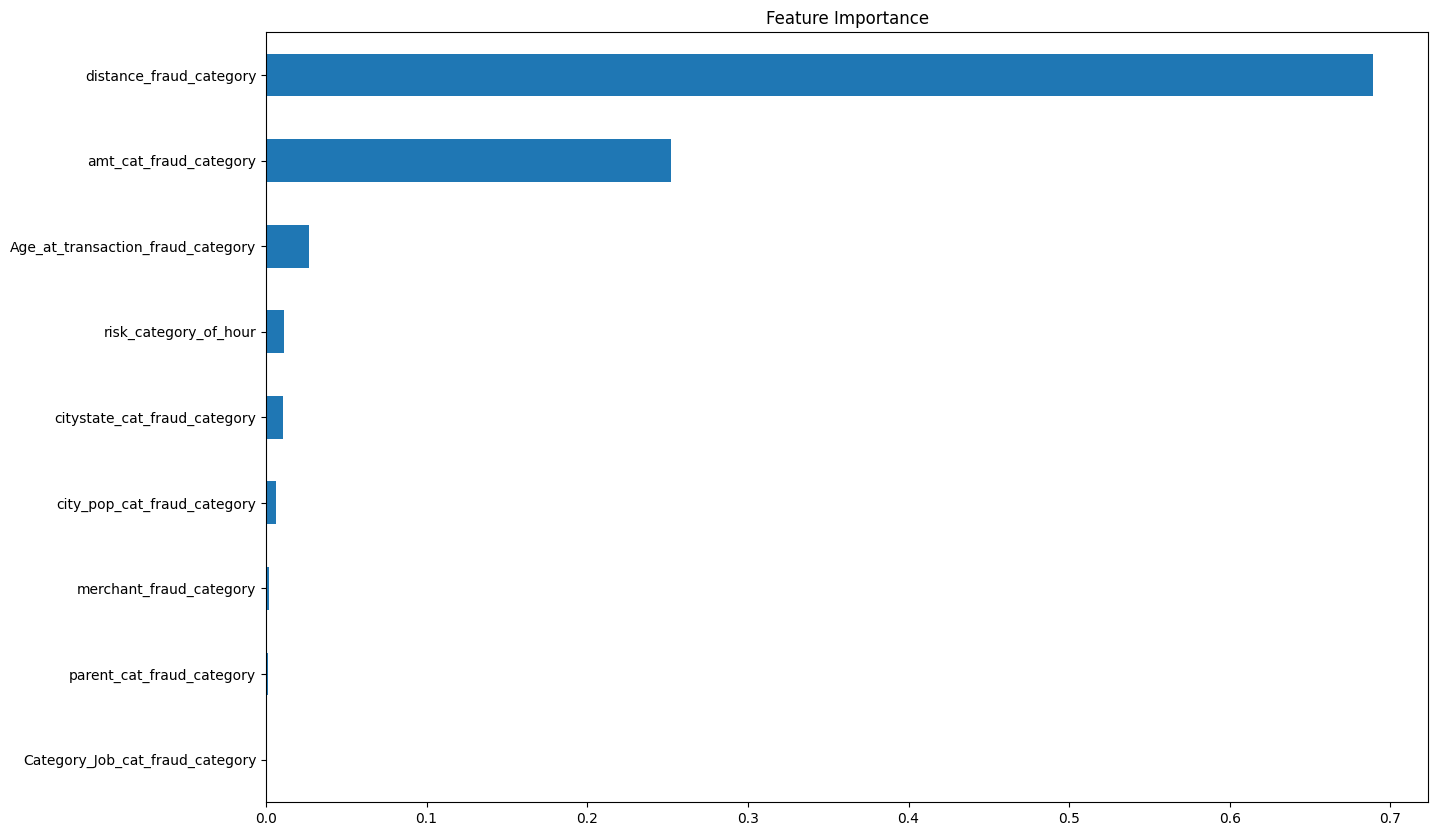

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Assuming X and y are your features and target variable
rf_clf = RandomForestClassifier()  # Initialize the RandomForestClassifier
rf_clf.fit(X, y)  # Fit the model to your data

x_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
# Use x.columns to get the feature names for the index, which is 1-dimensional
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

# Modelling menggunakan Random Undersampling

In [122]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the training data
X_under, y_under = rus.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_under_scaled = scaler.fit_transform(X_under)  # Fit and transform on undersampled data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Train a Logistic Regression model on the resampled data
lr_under = LogisticRegression()
lr_under.fit(X_under_scaled, y_under)  # Train on scaled undersampled data

# Make predictions on the test set (using scaled test data)
y_pred = lr_under.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      1.00      1.00      1501

    accuracy                           1.00    259335
   macro avg       1.00      1.00      1.00    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix:
[[257834      0]
 [     0   1501]]


Metrics for Random Undersampling:
------------------------------
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


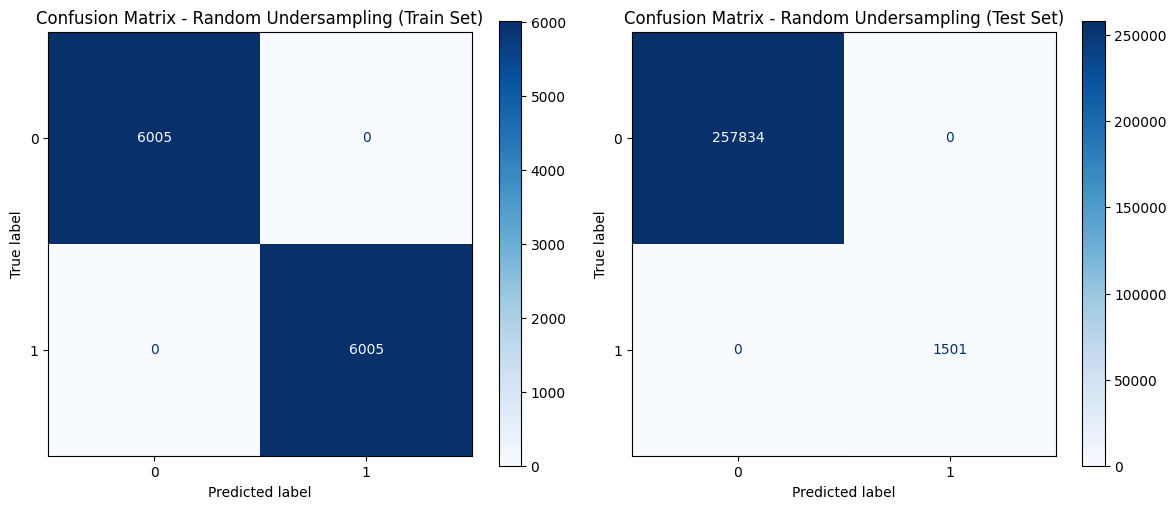

In [123]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined

# 1. Resample using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)

# 2. Scale the data
scaler = StandardScaler()
X_under_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)

# 3. Train Logistic Regression model
lr_under = LogisticRegression()
lr_under.fit(X_under_scaled, y_under)

# 4. Predict on train and test sets
y_pred_train_under = lr_under.predict(X_under_scaled)
y_pred_test_under = lr_under.predict(X_test_scaled)

# 5. Print evaluation metrics
print("Metrics for Random Undersampling:")
print("-" * 30)

print("Train Set:")
print("Accuracy:", accuracy_score(y_under, y_pred_train_under))
print("Precision:", precision_score(y_under, y_pred_train_under))
print("Recall:", recall_score(y_under, y_pred_train_under))
print("F1 Score:", f1_score(y_under, y_pred_train_under))

print("\nTest Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_under))
print("Precision:", precision_score(y_test, y_pred_test_under))
print("Recall:", recall_score(y_test, y_pred_test_under))
print("F1 Score:", f1_score(y_test, y_pred_test_under))

# 6. Plot confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 2 subplots

# Confusion matrix for train set
cm_train_under = confusion_matrix(y_under, y_pred_train_under, labels=[0, 1])
disp_train_under = ConfusionMatrixDisplay(confusion_matrix=cm_train_under, display_labels=[0, 1])
disp_train_under.plot(ax=axes[0], cmap='Blues')  # Plot on the first subplot
axes[0].set_title("Confusion Matrix - Random Undersampling (Train Set)")

# Confusion matrix for test set
cm_test_under = confusion_matrix(y_test, y_pred_test_under, labels=[0, 1])
disp_test_under = ConfusionMatrixDisplay(confusion_matrix=cm_test_under, display_labels=[0, 1])
disp_test_under.plot(ax=axes[1], cmap='Blues')  # Plot on the second subplot
axes[1].set_title("Confusion Matrix - Random Undersampling (Test Set)")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Modelling menggunakan SMOTE

In [124]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Fit and transform on resampled data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

# Train a Logistic Regression model on the resampled data
lr_smote = LogisticRegression()
lr_smote.fit(X_resampled_scaled, y_resampled)  # Train on scaled resampled data

# Make predictions on the test set (using scaled test data)
y_pred_smote = lr_smote.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      1.00      1.00      1501

    accuracy                           1.00    259335
   macro avg       1.00      1.00      1.00    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix:
[[257834      0]
 [     0   1501]]


Metrics for SMOTE:
------------------------------
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


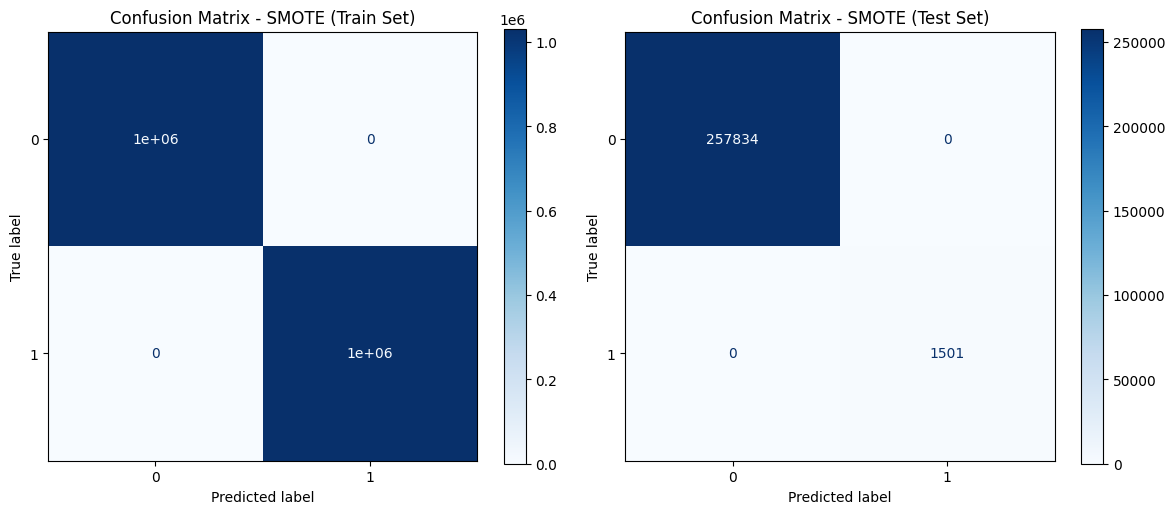

In [125]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined

# 1. Resample using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Scale the data
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# 3. Train Logistic Regression model
lr_smote = LogisticRegression()
lr_smote.fit(X_resampled_scaled, y_resampled)

# 4. Predict on train and test sets
y_pred_train_smote = lr_smote.predict(X_resampled_scaled)
y_pred_test_smote = lr_smote.predict(X_test_scaled)

# 5. Print evaluation metrics
print("Metrics for SMOTE:")
print("-" * 30)

print("Train Set:")
print("Accuracy:", accuracy_score(y_resampled, y_pred_train_smote))
print("Precision:", precision_score(y_resampled, y_pred_train_smote))
print("Recall:", recall_score(y_resampled, y_pred_train_smote))
print("F1 Score:", f1_score(y_resampled, y_pred_train_smote))

print("\nTest Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_smote))
print("Precision:", precision_score(y_test, y_pred_test_smote))
print("Recall:", recall_score(y_test, y_pred_test_smote))
print("F1 Score:", f1_score(y_test, y_pred_test_smote))

# 6. Plot confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for train set
cm_train_smote = confusion_matrix(y_resampled, y_pred_train_smote, labels=[0, 1])
disp_train_smote = ConfusionMatrixDisplay(confusion_matrix=cm_train_smote, display_labels=[0, 1])
disp_train_smote.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - SMOTE (Train Set)")

# Confusion matrix for test set
cm_test_smote = confusion_matrix(y_test, y_pred_test_smote, labels=[0, 1])
disp_test_smote = ConfusionMatrixDisplay(confusion_matrix=cm_test_smote, display_labels=[0, 1])
disp_test_smote.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Confusion Matrix - SMOTE (Test Set)")

plt.tight_layout()
plt.show()

# AdaBoost Algorithm

Tanpa tuning

In [126]:
from sklearn.ensemble import AdaBoostClassifier

#menggunakan adaboost algorithm
ada = AdaBoostClassifier(random_state=42)

#fitting model
ada.fit(X_train,y_train)

#prediciton
pred_train = ada.predict(X_train)
pred_test = ada.predict(X_test)

In [127]:
# performance
#train
acc_train = accuracy_score(y_train,pred_train)
prec_train = precision_score(y_train,pred_train)
recall_train = recall_score(y_train,pred_train)
f1_train = f1_score(y_train,pred_train)

#test
acc_test = accuracy_score(y_test,pred_test)
prec_test = precision_score(y_test,pred_test)
recall_test = recall_score(y_test,pred_test)
f1_test = f1_score(y_test,pred_test)


pd.DataFrame(
    {
        "Train":[acc_train,prec_train,recall_train,f1_train],
        "Test":[acc_test,prec_test,recall_test,f1_test]
    },index=["Akurasi","Precision","Recall","F1"]
)

,Train,Test
Akurasi,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
F1,1.0,1.0


Tanpa tuning: Base Estimator Logistic

In [128]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=42)

ada = AdaBoostClassifier(random_state=42,estimator=logreg)

#fitting model
ada.fit(X_train,y_train)

#prediciton
pred_train = ada.predict(X_train)
pred_test = ada.predict(X_test)

#performance
#train
acc_train = accuracy_score(y_train,pred_train)
prec_train = precision_score(y_train,pred_train)
recall_train = recall_score(y_train,pred_train)
f1_train = f1_score(y_train,pred_train)

#test
acc_test = accuracy_score(y_test,pred_test)
prec_test = precision_score(y_test,pred_test)
recall_test = recall_score(y_test,pred_test)
f1_test = f1_score(y_test,pred_test)


pd.DataFrame(
    {
        "Train":[acc_train,prec_train,recall_train,f1_train],
        "Test":[acc_test,prec_test,recall_test,f1_test]
    },index=["Akurasi","Precision","Recall","F1"]
)

,Train,Test
Akurasi,0.999853,0.999877
Precision,0.997112,0.995949
Recall,0.977519,0.982678
F1,0.987218,0.989269


Tanpa Tunning : Base Estimator SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")

ada = AdaBoostClassifier(random_state=42,estimator=svc,algorithm='SAMME')

#fitting model
ada.fit(X_train,y_train)

#prediciton
pred_train = np.where(
    ada.predict_proba(X_train)[:,1]>0.5,1,0
)

pred_test = np.where(
    ada.predict_proba(X_test)[:,1]>0.5,1,0
)

#performance
#train
acc_train = accuracy_score(y_train,pred_train)
prec_train = precision_score(y_train,pred_train)
recall_train = recall_score(y_train,pred_train)
f1_train = f1_score(y_train,pred_train)

#test
acc_test = accuracy_score(y_test,pred_test)
prec_test = precision_score(y_test,pred_test)
recall_test = recall_score(y_test,pred_test)
f1_test = f1_score(y_test,pred_test)


pd.DataFrame(
    {
        "Train":[acc_train,prec_train,recall_train,f1_train],
        "Test":[acc_test,prec_test,recall_test,f1_test]
    },index=["Akurasi","Precision","Recall","F1"]
)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


# Modelling menggunakan AdaBoost

In [129]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Instantiate AdaBoostClassifier with DecisionTreeClassifier as base estimator
# Use 'estimator' instead of 'base_estimator'
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model
ada.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ada = ada.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ada))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       1.00      1.00      1.00      1501

    accuracy                           1.00    259335
   macro avg       1.00      1.00      1.00    259335
weighted avg       1.00      1.00      1.00    259335


Confusion Matrix:
[[257834      0]
 [     0   1501]]


Metrics for AdaBoost:
------------------------------
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


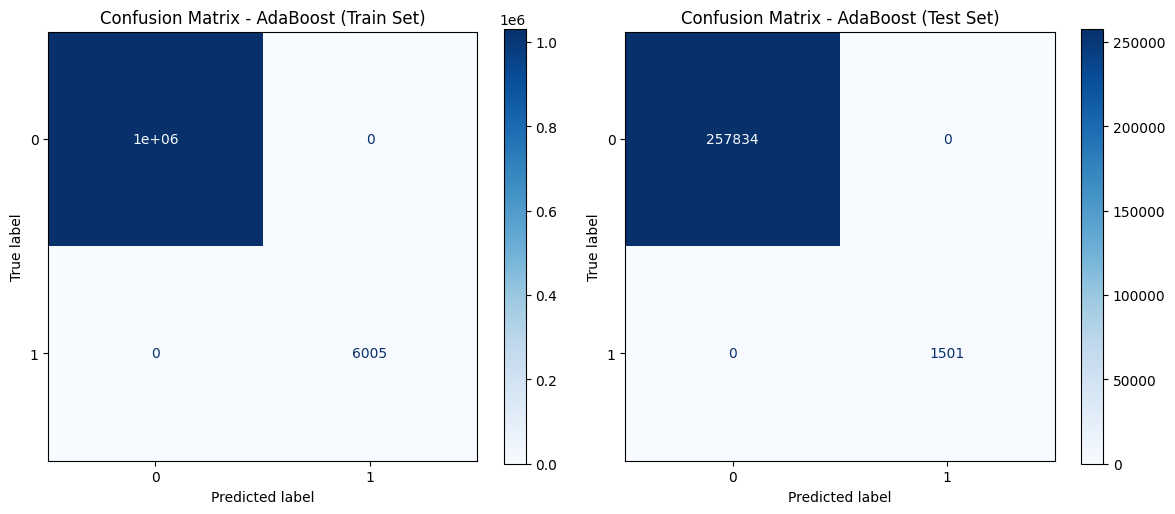

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are defined

# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train AdaBoost model
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada.fit(X_train_scaled, y_train)

# 3. Predict on train and test sets
y_pred_train_ada = ada.predict(X_train_scaled)
y_pred_test_ada = ada.predict(X_test_scaled)

# 4. Print evaluation metrics
print("Metrics for AdaBoost:")
print("-" * 30)

print("Train Set:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_ada))
print("Precision:", precision_score(y_train, y_pred_train_ada))
print("Recall:", recall_score(y_train, y_pred_train_ada))
print("F1 Score:", f1_score(y_train, y_pred_train_ada))

print("\nTest Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_test_ada))
print("Precision:", precision_score(y_test, y_pred_test_ada))
print("Recall:", recall_score(y_test, y_pred_test_ada))
print("F1 Score:", f1_score(y_test, y_pred_test_ada))

# 5. Plot confusion matrices for train and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for train set
cm_train_ada = confusion_matrix(y_train, y_pred_train_ada, labels=[0, 1])
disp_train_ada = ConfusionMatrixDisplay(confusion_matrix=cm_train_ada, display_labels=[0, 1])
disp_train_ada.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - AdaBoost (Train Set)")

# Confusion matrix for test set
cm_test_ada = confusion_matrix(y_test, y_pred_test_ada, labels=[0, 1])
disp_test_ada = ConfusionMatrixDisplay(confusion_matrix=cm_test_ada, display_labels=[0, 1])
disp_test_ada.plot(ax=axes[1], cmap='Blues')
axes[1].set_title("Confusion Matrix - AdaBoost (Test Set)")

plt.tight_layout()
plt.show()

# **Perbandingan Hasil F1 score,precision,accuracy,recall**

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pisahkan fitur (X) dan target (y)
X = df_fraud_train[['merchant_fraud_category','parent_cat_fraud_category','amt_cat_fraud_category','citystate_cat_fraud_category','city_pop_cat_fraud_category','Category_Job_cat_fraud_category','risk_category_of_hour','Age_at_transaction_fraud_category','distance_fraud_category']] #independent / feature
y = df_fraud_train['is_fraud'] #dependent / label


# Bagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

# Moved the models dictionary outside the function
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Teknik resampling
resampling_techniques = {
    'Random Oversampling': RandomOverSampler(),
    'Random Undersampling': RandomUnderSampler(),
    'SMOTE': SMOTE()
}

results = []

for model_name, model in models.items():
    # Tanpa resampling
    accuracy, precision, recall, f1, cm = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append([model_name, 'None', accuracy, precision, recall, f1, cm])

    # Dengan resampling
    for resampling_name, resampling_technique in resampling_techniques.items():
        X_resampled, y_resampled = resampling_technique.fit_resample(X_train, y_train)
        accuracy, precision, recall, f1, cm = evaluate_model(model, X_resampled, X_test, y_resampled, y_test)
        results.append([model_name, resampling_name, accuracy, precision, recall, f1, cm])

df_results = pd.DataFrame(results, columns=['Model', 'Resampling', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Confusion Matrix'])


In [132]:
df_results

,Model,Resampling,Accuracy,Precision,Recall,F1-score,Confusion Matrix
0,Logistic Regression,None,0.999996,1.0,0.999334,0.999667,"[[257834, 0], [1, 1500]]"
1,Logistic Regression,Random Oversampling,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
2,Logistic Regression,Random Undersampling,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
3,Logistic Regression,SMOTE,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
4,Random Forest,None,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
5,Random Forest,Random Oversampling,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
6,Random Forest,Random Undersampling,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
7,Random Forest,SMOTE,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
8,AdaBoost,None,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
9,AdaBoost,Random Oversampling,1.000000,1.0,1.000000,1.000000,"[[257834, 0], [0, 1501]]"
